# Predict Clicked Ads Customer Classification by using Machine Learning

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.rename(columns={"Unnamed: 0": ""}, inplace=True)
df.set_index("", inplace=True)
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
                                                                      
0                     68.95   35  432837300.0                256.09   
1                     80.23   31  479092950.0                193.77   
2                     69.47   26  418501580.0                236.50   
3                     74.15   29  383643260.0                245.89   
4                     68.37   35  517229930.0                225.58   

        Male        Timestamp Clicked on Ad           city  \
                                                             
0  Perempuan   3/27/2016 0:53            No  Jakarta Timur   
1  Laki-Laki    4/4/2016 1:39            No       Denpasar   
2  Perempuan  3/13/2016 20:35            No       Surabaya   
3  Laki-Laki   1/10/2016 2:31            No          Batam   
4  Perempuan    6/3/2016 3:36            No          Medan   

                        province    category  
                                              
0  Daerah Khusus Ibukota Jakarta   Furniture  
1                           Bali        Food  
2                     Jawa Timur  Electronic  
3                 Kepulauan Riau       House  
4                  Sumatra Utara     Finance

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


# EDA

In [4]:
df.rename(columns={"Male": "Sex"}, inplace=True) #change column name

In [5]:
df = df.replace({'province' : {'Daerah Khusus Ibukota Jakarta' : 'DKI Jakarta'}})

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df.duplicated().sum() #check duplicated value

0

In [8]:
# check missing value percentage
df.isnull().sum().sort_values(ascending=False)/len(df)

Daily Time Spent on Site    0.013
Area Income                 0.013
Daily Internet Usage        0.011
Sex                         0.003
Age                         0.000
Timestamp                   0.000
Clicked on Ad               0.000
city                        0.000
province                    0.000
category                    0.000
dtype: float64

In [9]:
df[df.isna().any(axis=1)]

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
                                                                        
18                      54.70   36  217612780.0                   NaN   
25                        NaN   28  453796000.0                204.79   
32                      59.05   57          NaN                169.23   
39                        NaN   39  192558870.0                162.08   
46                      69.62   20          NaN                202.25   
63                        NaN   32  431207350.0                   NaN   
90                      69.90   43          NaN                138.35   
99                      79.71   34  486197810.0                   NaN   
110                       NaN   60  422333660.0                176.98   
151                       NaN   35  507674020.0                172.10   
158                     80.46   27          NaN                   NaN   
177                     72.04   22          NaN                199.43   
247                     57.05   41  351952230.0                   NaN   
256                       NaN   32  431257610.0                231.42   
364                       NaN   42  515262930.0                231.48   
408                     51.68   49          NaN                258.62   
455                     66.17   33          NaN                238.45   
491                     59.12   33  197470210.0                   NaN   
538                     84.53   35          NaN                236.29   
619                     74.54   24  402631110.0                   NaN   
620                     81.75   24  368592910.0                190.08   
653                     86.53   46  325500770.0                   NaN   
654                       NaN   26  411741120.0                224.20   
656                     85.24   31          NaN                182.84   
691                     87.16   37          NaN                231.95   
698                       NaN   28  340756780.0                189.91   
739                     82.37   30  445650240.0                   NaN   
743                       NaN   37  354701200.0                105.86   
817                     54.47   23  327460630.0                141.52   
863                     76.64   39          NaN                241.50   
880                       NaN   33  157192280.0                154.93   
921                     55.71   37          NaN                112.52   
926                     72.55   22  412671070.0                   NaN   
927                       NaN   38  257838280.0                184.98   
977                     54.97   31          NaN                116.38   
991                     38.96   38  255480540.0                   NaN   
997                       NaN   51  296910040.0                120.37   

           Sex           Timestamp Clicked on Ad               city  \
                                                                      
18   Laki-Laki 2016-02-13 07:53:00           Yes           Makassar   
25   Laki-Laki 2016-05-27 15:25:00            No      Jakarta Pusat   
32   Laki-Laki 2016-07-15 05:05:00           Yes        Tasikmalaya   
39   Perempuan 2016-03-11 06:49:00           Yes             Cimahi   
46   Laki-Laki 2016-02-26 22:46:00            No        Tasikmalaya   
63   Laki-Laki 2016-03-31 20:55:00            No           Makassar   
90   Perempuan 2016-05-13 11:51:00           Yes    Jakarta Selatan   
99   Laki-Laki 2016-07-02 14:57:00            No      Jakarta Utara   
110  Perempuan 2016-01-16 23:37:00           Yes      Jakarta Utara   
151  Perempuan 2016-05-28 20:41:00            No           Makassar   
158  Laki-Laki 2016-02-04 02:13:00            No     Bandar Lampung   
177  Perempuan 2016-02-10 06:52:00            No  Tangerang Selatan   
247  Laki-Laki 2016-01-09 03:45:00           Yes             Bekasi   
256  Perempuan 2016-01-31 04:10:00            No           Semarang   
364  Laki-Laki 2016-0

- ingin mengetahui pola dari customer saat menggunakan internet
- apakah durasi customer saat berada dalam sebuah website akan berpengaruh pada marketing perusahaan tersebut, hal ini tentunya akan menghitung pola perilaku customer yang mengklik iklan yang disajikan. 
- ingin mengetahui bagaimana interval umur yang dapat menjadi target marketing, yaitu rentang umur berapa yang akan mengunjungi iklan tersebut. 
<br>Pada tahap ini, analisis dapat menggunakan bivariate dan multivariate analysis serta korelasi antara variabel tersebut, sehingga dapat tervisualisasikan dengan baik.

## Descriptive Statistics

In [10]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count                987.000000  1000.000000  9.870000e+02   
mean                  64.929524    36.009000  3.848647e+08   
std                   15.844699     8.785562  9.407999e+07   
min                   32.600000    19.000000  9.797550e+07   
25%                   51.270000    29.000000  3.286330e+08   
50%                   68.110000    35.000000  3.990683e+08   
75%                   78.460000    42.000000  4.583554e+08   
max                   91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max              267.010000

- Tidak terdapat nilai duplikat pada data
- Variabel age dan dan area income memiliki mean dan median yang hampir sama, sehingga data hampir memiliki pola distribusi normal
- Variabel daily time spent on site dan daily internet usage memiliki mean yang lebih kecil dari median yang menandakan pola distribusi negatively skewed
- Terdapat missing value pada variabel daily time spent on site, area income, daily internet usage

In [11]:
df.describe(include='object')

Sex Clicked on Ad      city     province  category
count         997          1000      1000         1000      1000
unique          2             2        30           16        10
top     Perempuan            No  Surabaya  DKI Jakarta  Otomotif
freq          518           500        64          253       112

- Tidak terdapat keanehan nilai statistika pada variabel sex, timestamp, clicked on ad, city, province, dan category
- Terdapat missing value pada variabel sex

In [12]:
cat = ['Sex', 'city', 'province','category']
for col in cat:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Sex
Perempuan    518
Laki-Laki    479
Name: Sex, dtype: int64
------------------------------ 

value counts of column city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64
------------------------------ 

value counts of column province
DKI Jakarta           253
Jawa Barat        

In [13]:
# check value in categorical columns
print(df['Sex']. unique(), "\n")
print(df['city']. unique(), "\n")
print(df['province'].unique(), "\n")
print(df['category'].unique())

['Perempuan' 'Laki-Laki' nan] 

['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan'] 

['DKI Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau' 'Sumatra Utara'
 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat' 'Jawa Tengah'
 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau'] 

['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']


## Univariate Analysis

In [14]:
sns.color_palette("Set1")
print(sns.color_palette("Set1").as_hex())

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


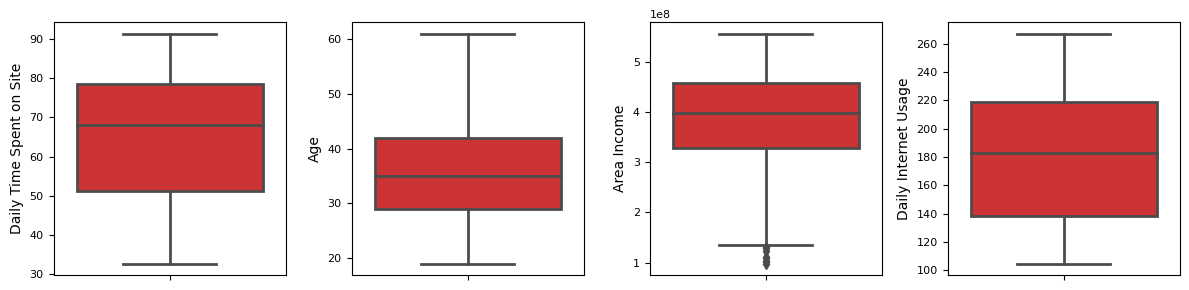

In [15]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='#e41a1c', orient='v')
    plt.tight_layout()

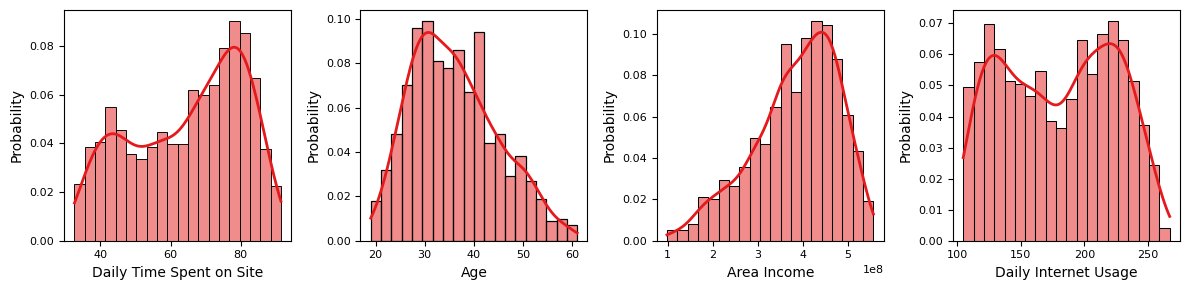

In [16]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.histplot(df[num[i]], kde = True, stat = "probability", color='#e41a1c', bins=20)
    plt.tight_layout()

- Age memiliki pola distribusi positively skew (miring ke kanan) dimana nilai mean > median
- Area income memiliki pola distribusi negatively skew (miring ke kiri) dimana nilai mean < median, terlihat nilai outlier pada boxplot yang menyebabkan ekor memanjang di sisi kiri histogram
- Daily time spent site memiliki pola negatively skew namun terlihat adanya bimodal yaitu dua puncak pada variabel yang menunjukkan bahwa data menunjukkan adanya dua grup berbeda dalam populasi
- Daily internet usage menunjukkan pola distribusi yang bimodal.

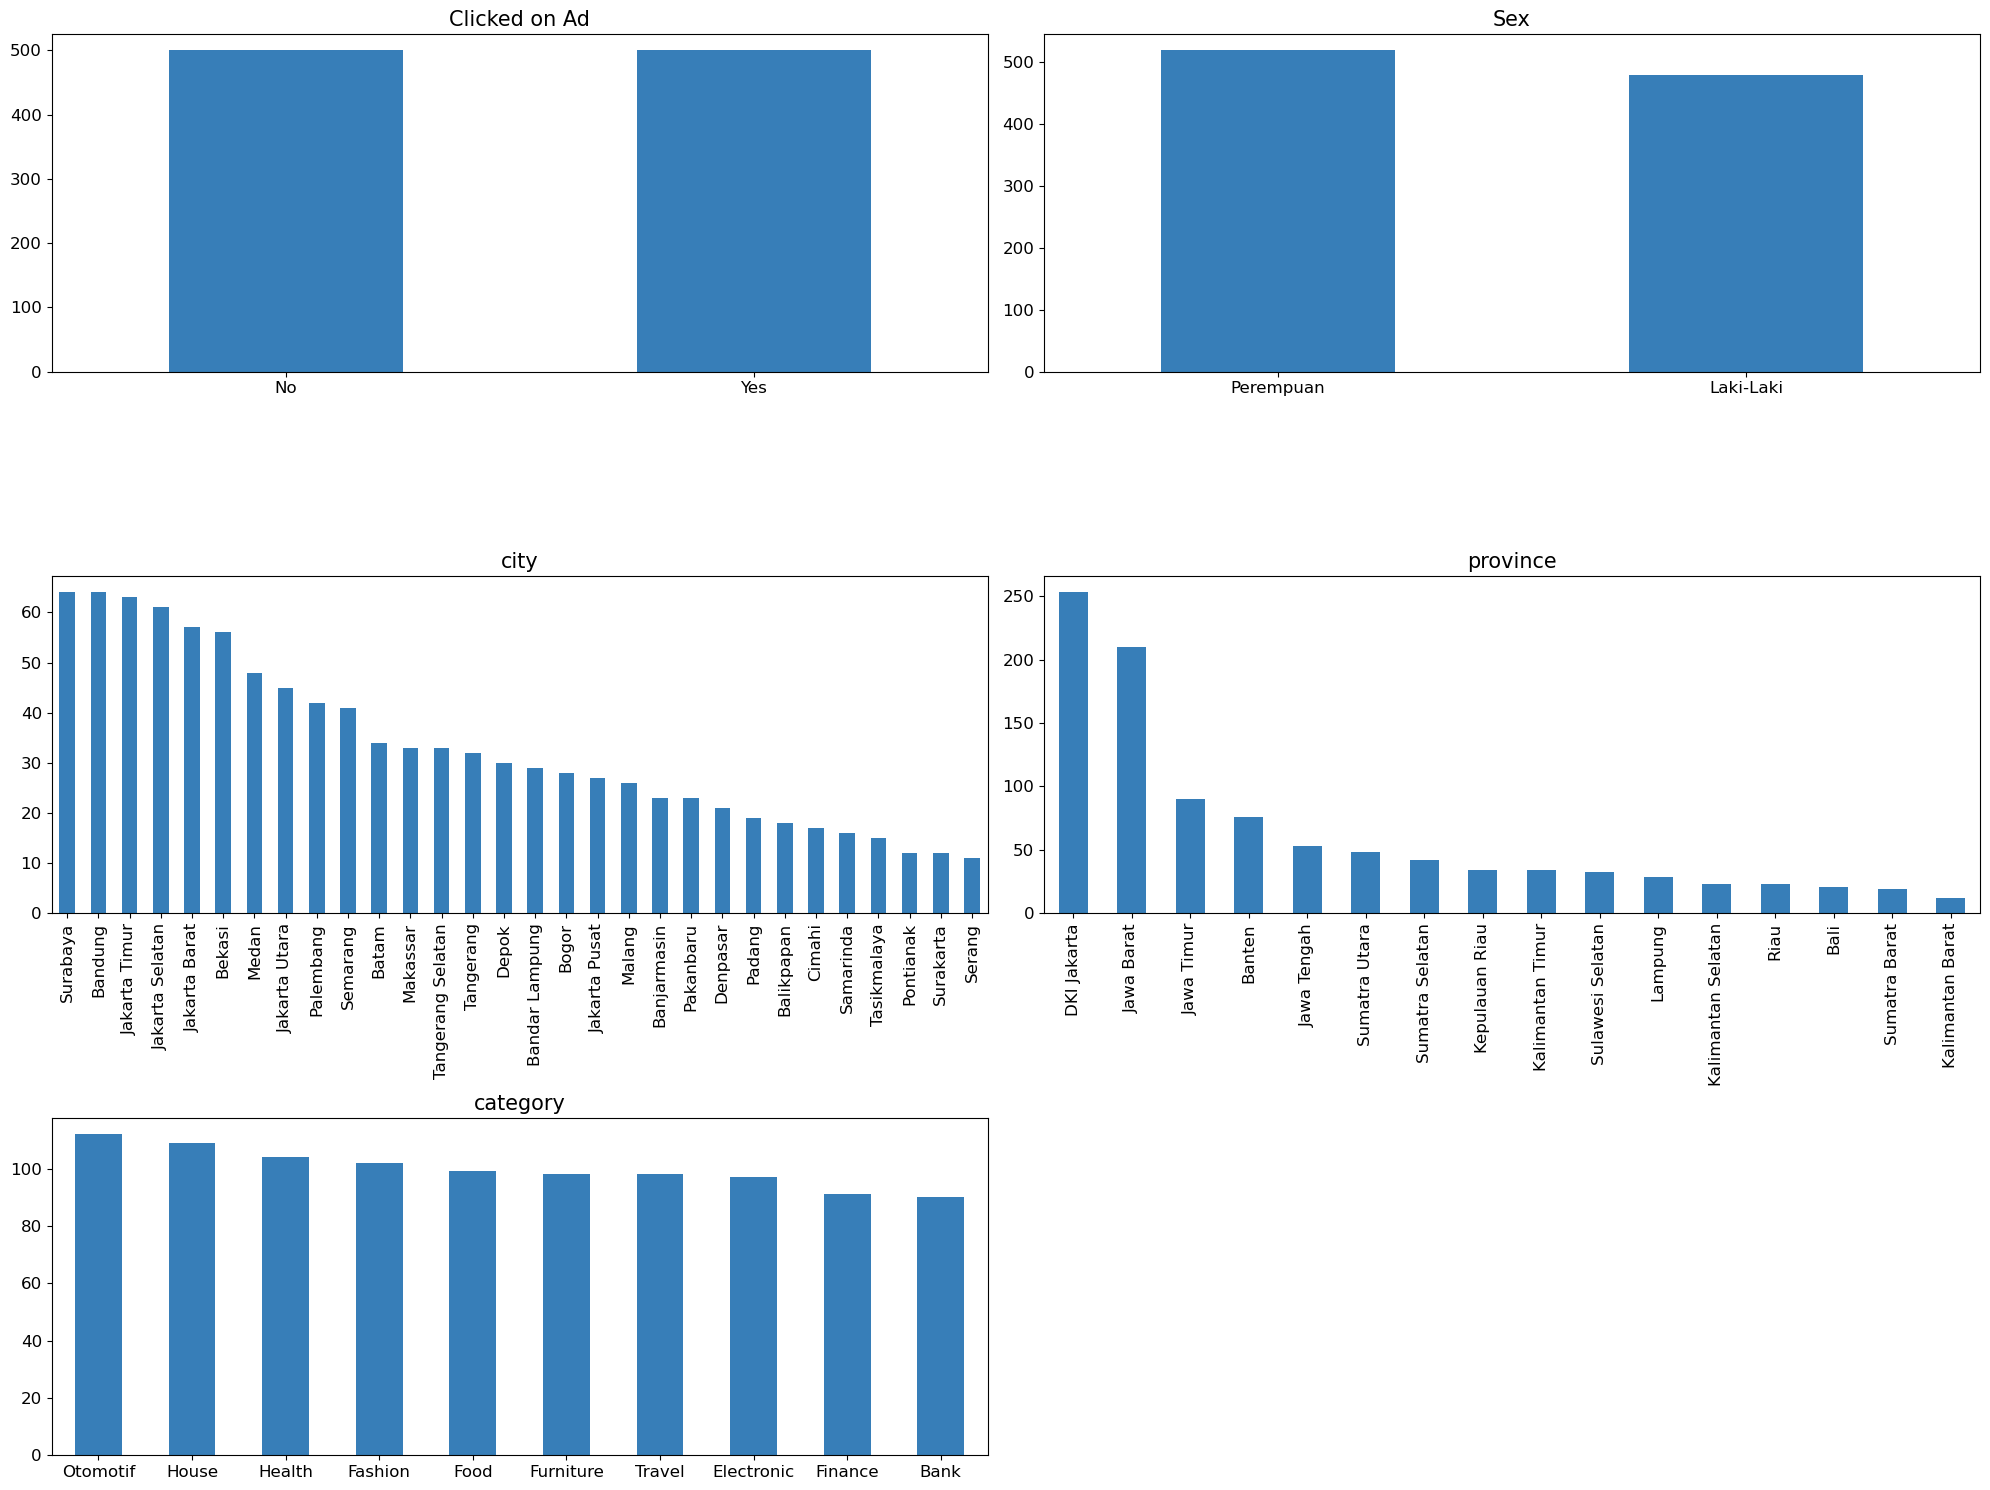

In [17]:
cat = ['Clicked on Ad', 'Sex', 'city', 'province', 'category']

rcParams['figure.figsize'] = 20, 15 # Increase figure size for better visualization

for i in range(len(cat)):
    plt.subplot(3, 2, i+1)
    df[cat[i]].value_counts().plot(kind='bar', color='#377eb8')
    plt.title(cat[i], fontsize=15)
    if cat[i] in ['Clicked on Ad', 'Sex', 'category']: 
        plt.xticks(rotation='horizontal', fontsize=12)
    if cat[i] in ['city', 'province']: 
        plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

- Kategori pada variabel jenis kelamin, click on ad, dan category memiliki proporsi yang hampir seimbang
- Kategori pada variabel city dan provinsi memiliki proporsi yang tidak seimbang

## Bivariate Analysis

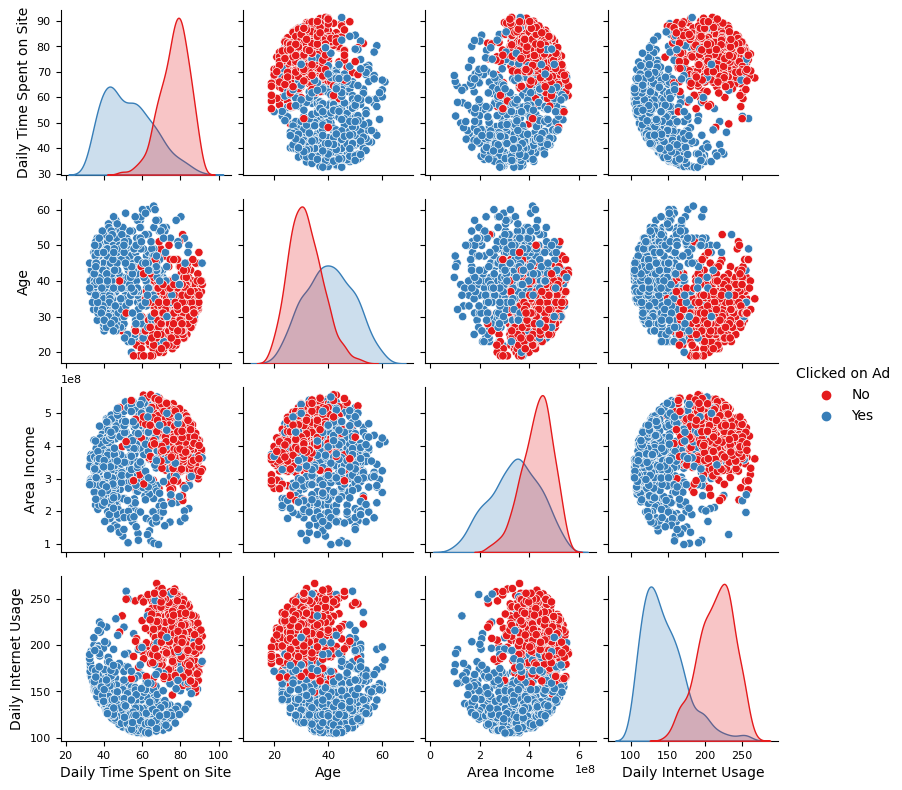

In [18]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

sns.pairplot(df[num+['Clicked on Ad']], hue='Clicked on Ad', diag_kind = 'kde', palette="Set1", height=2)
plt.show()

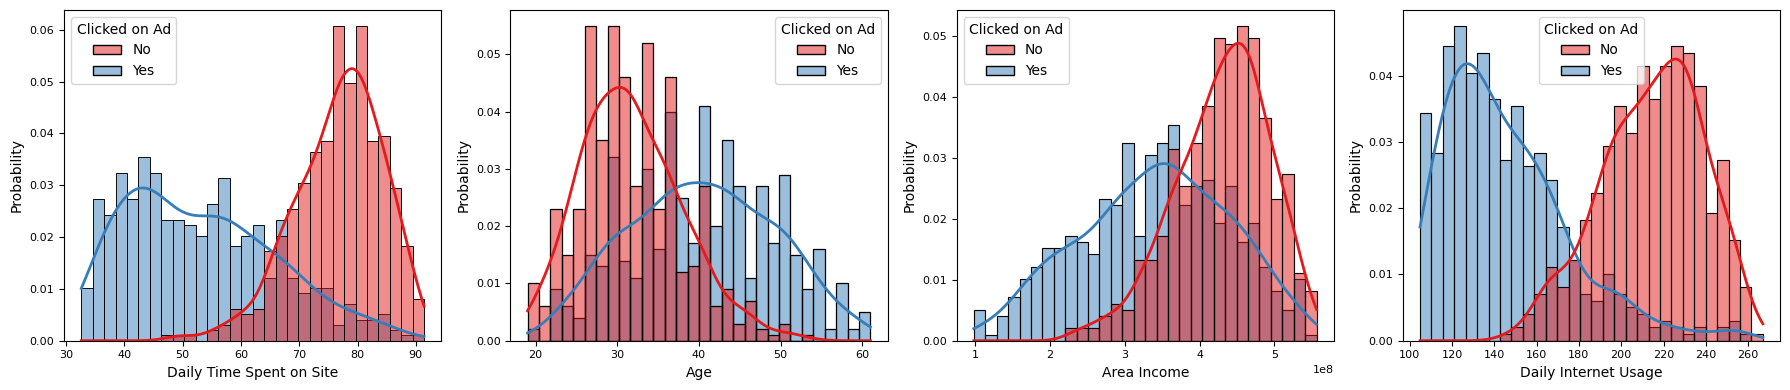

In [19]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

rcParams['figure.figsize'] = 18, 4 # Increase figure size for better visualization
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.histplot(data=df, x=num[i], stat = "probability", hue="Clicked on Ad", bins=30, palette="Set1", kde=True)
    plt.tight_layout()

Insight:
- tampak bahwa pengguna yang tidak mengklik iklan rata-rata menghabiskan waktu lebih lama di situs (rata-rata sekitar 76 menit) dibandingkan dengan mereka yang mengklik iklan (rata-rata sekitar 45 menit). Hal ini menunjukkan bahwa lama waktu pengguna menghabiskan waktu di situs memiliki hubungan dengan kemungkinan mereka mengklik iklan.
- usia rata-rata dari pengguna yang tidak mengklik iklan  sekitar 30 tahun, sementara pengguna yang mengklik iklan memiliki usia rata-rata yang lebih tinggi yaitu sekitar 40 tahun.
- pengguna yang tidak mengklik iklan memiliki rata-rata pendapatan area yang lebih tinggi dibandingkan dengan pengguna yang mengklik iklan
- pengguna yang tidak mengklik iklan rata-rata memiliki penggunaan internet harian yang lebih tinggi dibandingkan dengan pengguna yang mengklik iklan.

Rekomendasi Bisnis:

1. **Perpanjang Durasi Sesi**: memperpendek durasi sesi pengguna atau mendorong mereka untuk mengklik iklan lebih awal dalam sesi mereka. Ini bisa dilakukan dengan menempatkan iklan di tempat yang lebih menonjol atau menyesuaikan konten situs agar lebih menarik bagi pengguna.
2. **Optimalkan Penempatan Iklan**: Iklan yang ditempatkan di area situs yang sering dikunjungi pengguna dalam sesi awal mereka mungkin memiliki kemungkinan lebih besar untuk diklik. Analisis lebih lanjut tentang perilaku pengguna dapat membantu dalam mengoptimalkan penempatan iklan. Optimasi Iklan untuk Pengguna dengan Penggunaan Internet Tinggi.
3. **Target Demografi** dan **Personalisasi Iklan** : Menampilkan iklan yang relevan dengan kebutuhan dan minat pengguna di masing-masing kelompok usia dan kelompok income tertentu. Target Pengguna dengan Penggunaan Internet Rendah.
4. **Meningkatkan Engagement di Kalangan Muda**: Menampilkan iklan yang dirancang khusus untuk menarik minat pengguna muda.

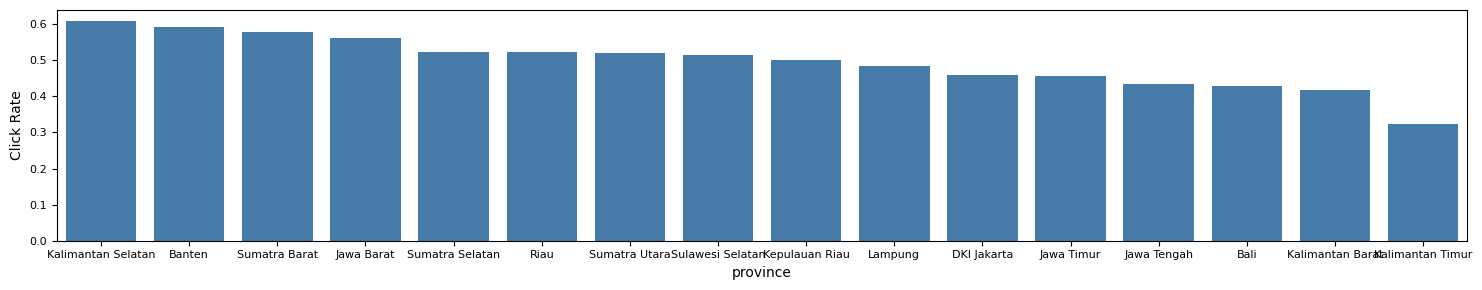

In [20]:
rcParams['figure.figsize'] = 15, 3
click_rate = df.groupby('province')['Clicked on Ad'].apply(lambda x: x.eq('Yes').mean()).sort_values(ascending=False)
sns.barplot(x=click_rate.index, y=click_rate.values, color='#377eb8', order=click_rate.index)
plt.xticks(rotation=0, fontsize=8)
plt.ylabel('Click Rate')
plt.tight_layout()

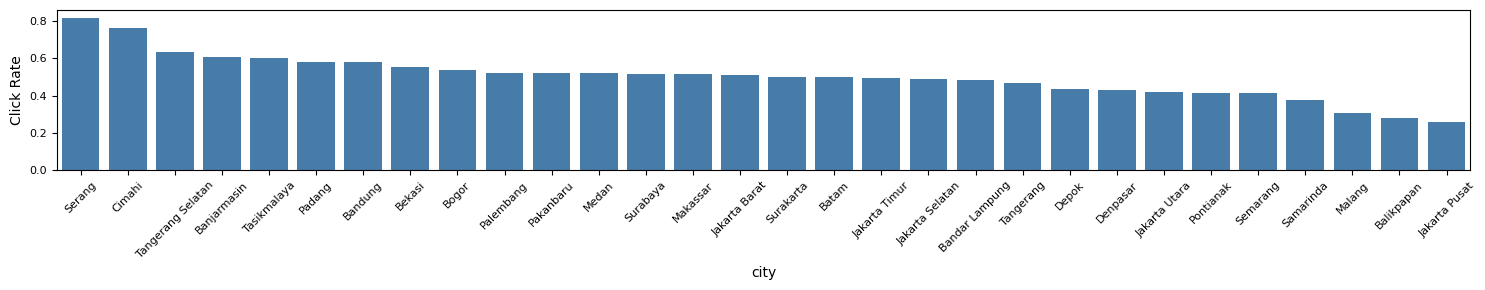

In [21]:
rcParams['figure.figsize'] = 15, 3
click_rate = df.groupby('city')['Clicked on Ad'].apply(lambda x: x.eq('Yes').mean()).sort_values(ascending=False)
sns.barplot(x=click_rate.index, y=click_rate.values, color='#377eb8', order=click_rate.index)
plt.ylabel('Click Rate')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

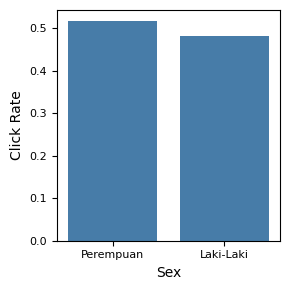

In [22]:
rcParams['figure.figsize'] = 3, 3
click_rate = df.groupby('Sex')['Clicked on Ad'].apply(lambda x: x.eq('Yes').mean()).sort_values(ascending=False)
sns.barplot(x=click_rate.index, y=click_rate.values, color='#377eb8', order=click_rate.index)
plt.ylabel('Click Rate')
plt.tight_layout()

Berdasarkan data click rate yang telah dianalisis, tampak bahwa iklan cenderung memiliki tingkat klik yang lebih tinggi di kalangan perempuan dibandingkan laki-laki. Click rate di kalangan perempuan adalah sekitar 51,7% sedangkan di kalangan laki-laki adalah sekitar 48,2%.

Rekomendasi Bisnis:

- Target Audience: Mengingat bahwa perempuan memiliki click rate yang lebih tinggi, strategi pemasaran dan penargetan mungkin perlu diperbarui untuk lebih fokus pada audiens perempuan. Misalnya, iklan dapat disesuaikan untuk lebih menarik bagi perempuan atau produk yang lebih populer di kalangan perempuan dapat dipromosikan lebih intensif.
- Personalisasi Iklan: Karena perempuan dan laki-laki memiliki tingkat klik yang berbeda, personalisasi iklan berdasarkan gender akan efektif. Personalisasi ini bisa melibatkan penyesuaian konten iklan, penawaran, dan waktu penayangan iklan.
- Meningkatkan Engagement Laki-Laki: Meskipun perempuan memiliki tingkat klik yang lebih tinggi, ini juga menunjukkan bahwa ada ruang untuk meningkatkan engagement di kalangan laki-laki. Strategi pemasaran dan iklan yang dirancang khusus untuk menarik minat laki-laki dapat membantu meningkatkan click rate di kelompok ini.

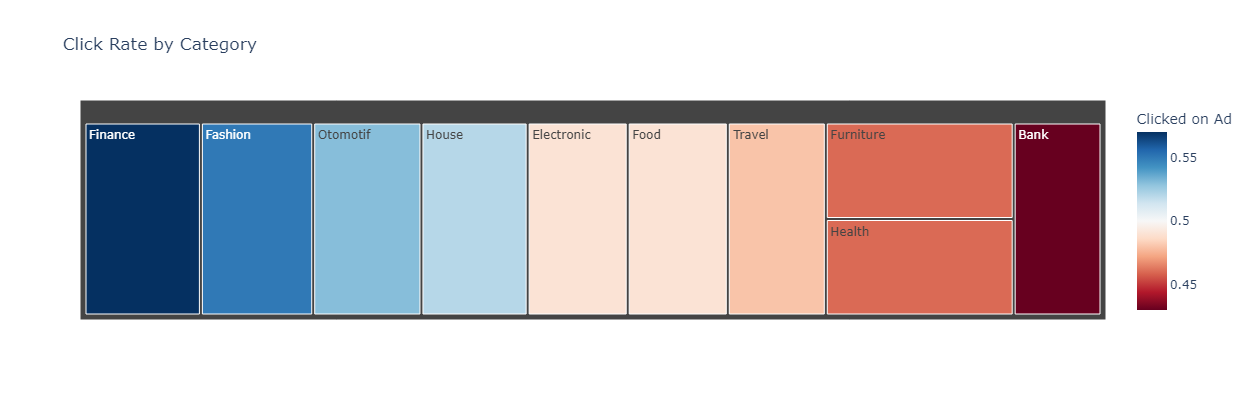

In [23]:
import plotly.express as px

# Menghitung click rate untuk 'category'
click_rate = df.groupby('category')['Clicked on Ad'].apply(lambda x: round(x.eq('Yes').mean(), 2)).reset_index()

# Membuat Treemap
fig = px.treemap(click_rate, path=['category'], values='Clicked on Ad',
                  color='Clicked on Ad', 
                  color_continuous_scale='RdBu',
                  title='Click Rate by Category')

# Mengatur ukuran grafik menjadi persegi
fig.update_layout(autosize=False, width=400, height=400)

fig.show()

Insight:

Dari data yang disediakan, kita bisa melihat bahwa tingkat klik (click rate) bervariasi tergantung pada kategori produk. Produk dalam kategori 'Finance' memiliki tingkat klik tertinggi (57%), diikuti oleh 'Fashion' (55%), 'Otomotif' (53%), dan 'House' (52%). Di sisi lain, kategori 'Bank' memiliki tingkat klik terendah (43%), diikuti oleh 'Furniture' dan 'Health' (keduanya 46%).

Rekomendasi Bisnis:
1. **Targeting Iklan**: Berdasarkan data ini, tampaknya ada peluang untuk lebih memfokuskan upaya pemasaran dan iklan pada kategori yang memiliki tingkat klik yang lebih tinggi. Misalnya, Anda mungkin ingin meningkatkan penargetan iklan untuk produk dalam kategori 'Finance', 'Fashion', 'Otomotif', dan 'House'.
2. **Optimasi Iklan**: Untuk kategori dengan tingkat klik yang lebih rendah seperti 'Bank', 'Furniture', dan 'Health', diperlukan iklan yang lebih menarik, menawarkan promosi atau diskon, atau mungkin mencoba pendekatan pemasaran yang berbeda.

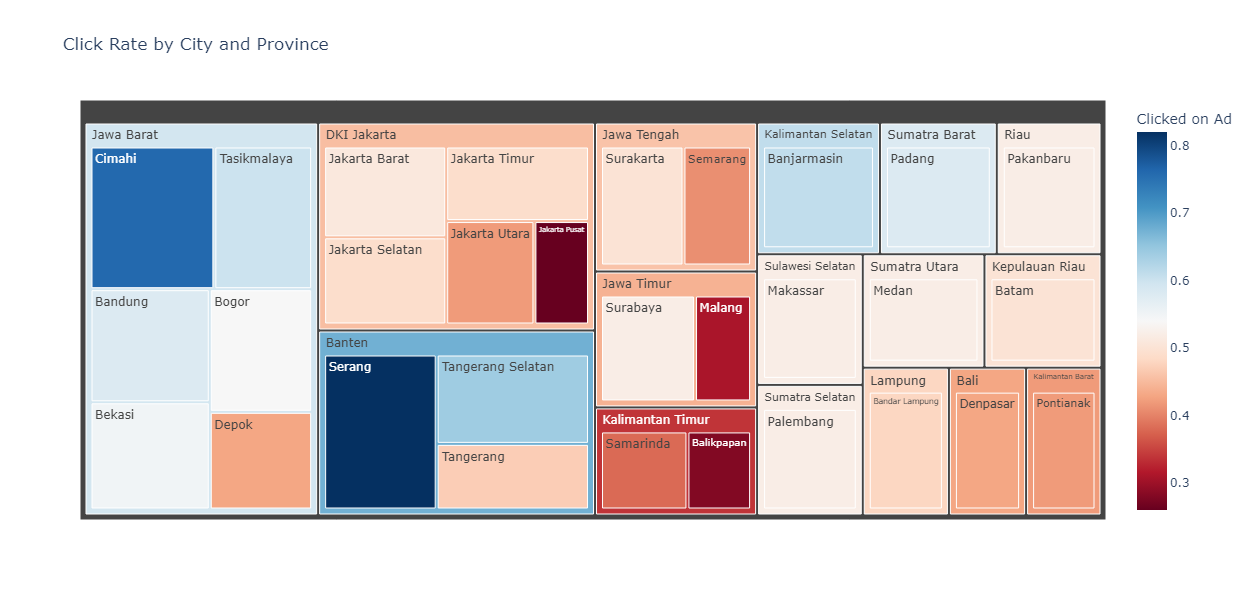

In [24]:
import plotly.express as px

# Menghitung click rate untuk setiap kombinasi 'city' dan 'province' dan membulatkannya
click_rate = df.groupby(['city', 'province'])['Clicked on Ad'].apply(lambda x: round(x.eq('Yes').mean(), 2)).reset_index()

# Membuat Treemap
fig = px.treemap(click_rate, path=['province', 'city'], values='Clicked on Ad',
                  color='Clicked on Ad', hover_data=['city'],
                  color_continuous_scale='RdBu',
                  title='Click Rate by City and Province')

# Mengubah ukuran grafik menjadi persegi
fig.update_layout(autosize=False, width=1000, height=600)

fig.show()

Insight:

Data menunjukkan bahwa tingkat klik (click rate) iklan berbeda-beda tergantung pada kota dan provinsi. 'Serang' di provinsi 'Banten' memiliki tingkat klik tertinggi (82%), diikuti oleh 'Cimahi' di 'Jawa Barat' (76%), dan 'Tangerang Selatan' di 'Banten' (64%). Di sisi lain, 'Jakarta Pusat' di 'DKI Jakarta' memiliki tingkat klik terendah (26%), diikuti oleh 'Balikpapan' di 'Kalimantan Timur' (28%) dan 'Malang' di 'Jawa Timur' (31%).

Rekomendasi Bisnis:

1. **Geotargeting Iklan**: meningkatkan penargetan iklan di daerah seperti 'Serang', 'Cimahi', dan 'Tangerang Selatan' yang memiliki tingkat klik yang lebih tinggi.
2. **Meningkatkan Engagement di Area dengan Klik Rate Rendah**: Untuk area dengan tingkat klik yang lebih rendah seperti 'Jakarta Pusat', 'Balikpapan', dan 'Malang', mungkin perlu strategi pemasaran yang berbeda. Iklan yang lebih menarik, penawaran khusus, atau penyesuaian waktu penayangan iklan bisa membantu meningkatkan click rate di area tersebut.

## Multivariate Analysis

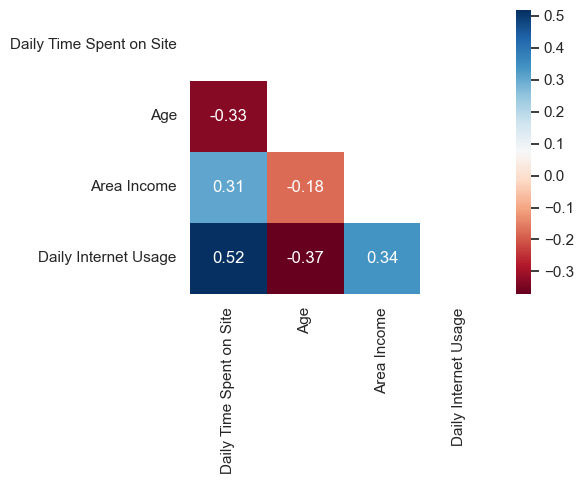

In [25]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu',  annot=True)
plt.tight_layout()
plt.show()

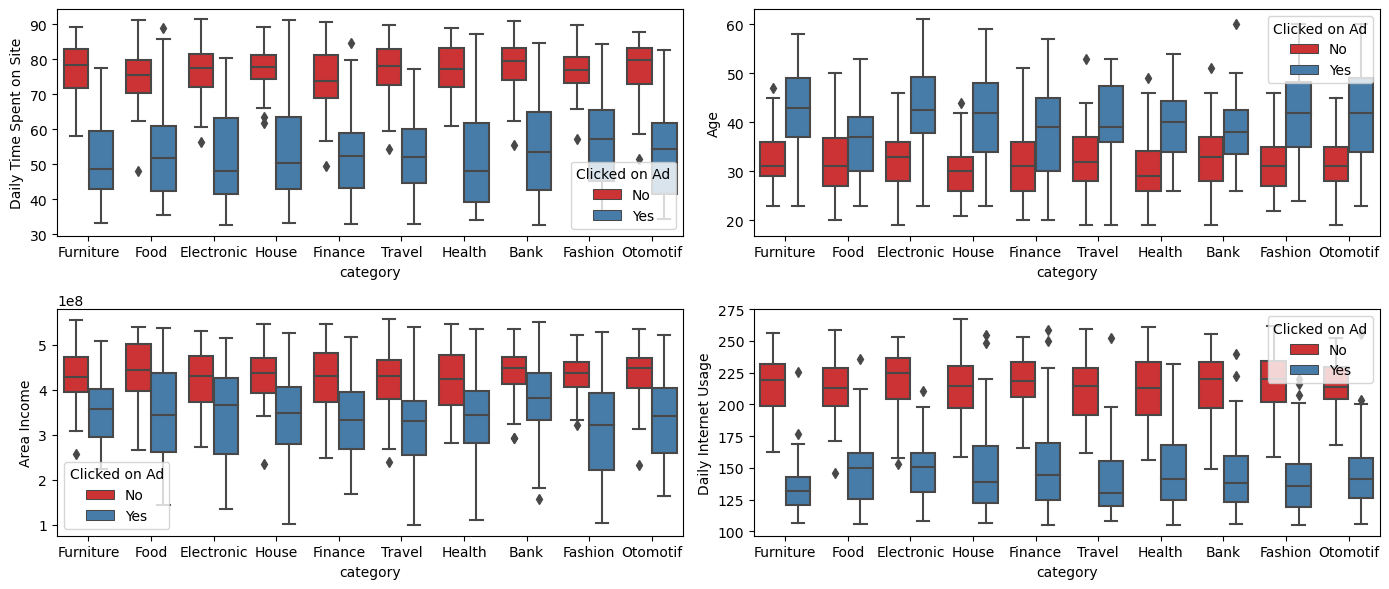

In [26]:
fig = plt.figure(figsize=(14, 6))
plt.style.use('default')

for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(ax=ax, data=df, x='category', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.tight_layout()

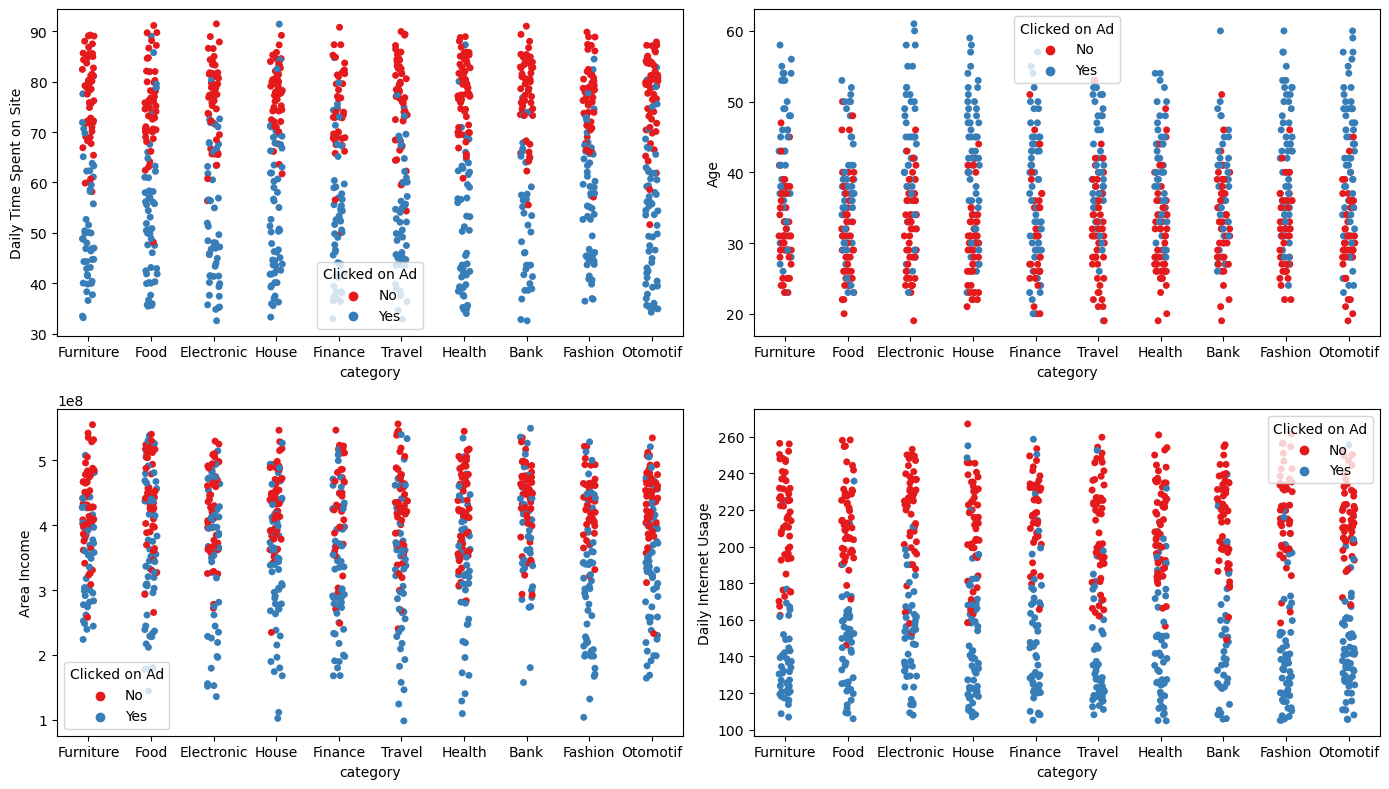

In [27]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=df, x='category', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.tight_layout()

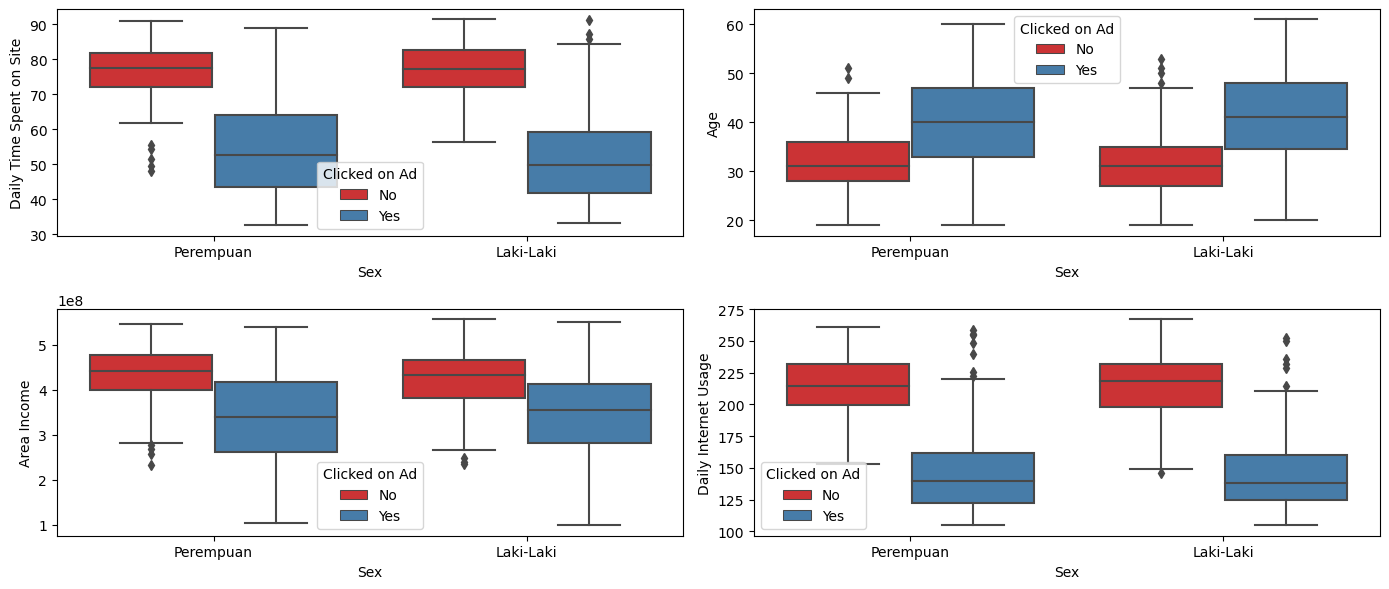

In [28]:
fig = plt.figure(figsize=(14, 6))
plt.style.use('default')

for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(ax=ax, data=df, x='Sex', y=num[i], hue='Clicked on Ad', palette='Set1')
    plt.tight_layout()

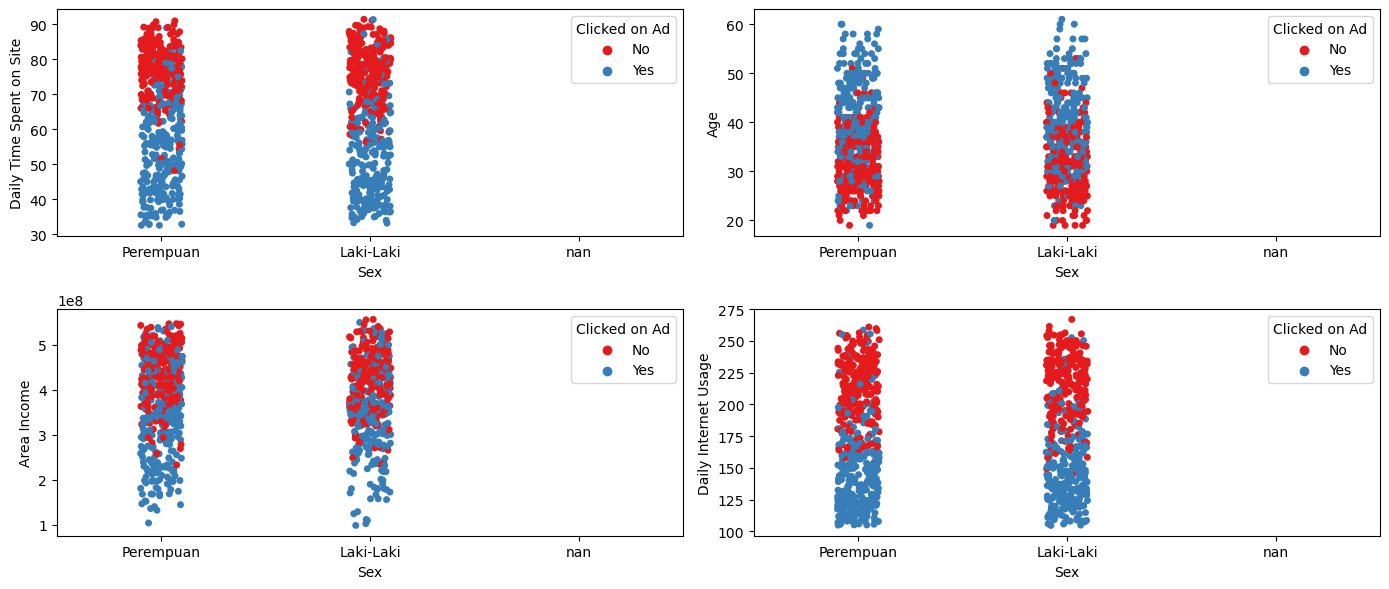

In [29]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig = plt.figure(figsize=(14, 6))
plt.style.use('default')
for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=df, x='Sex', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.tight_layout()

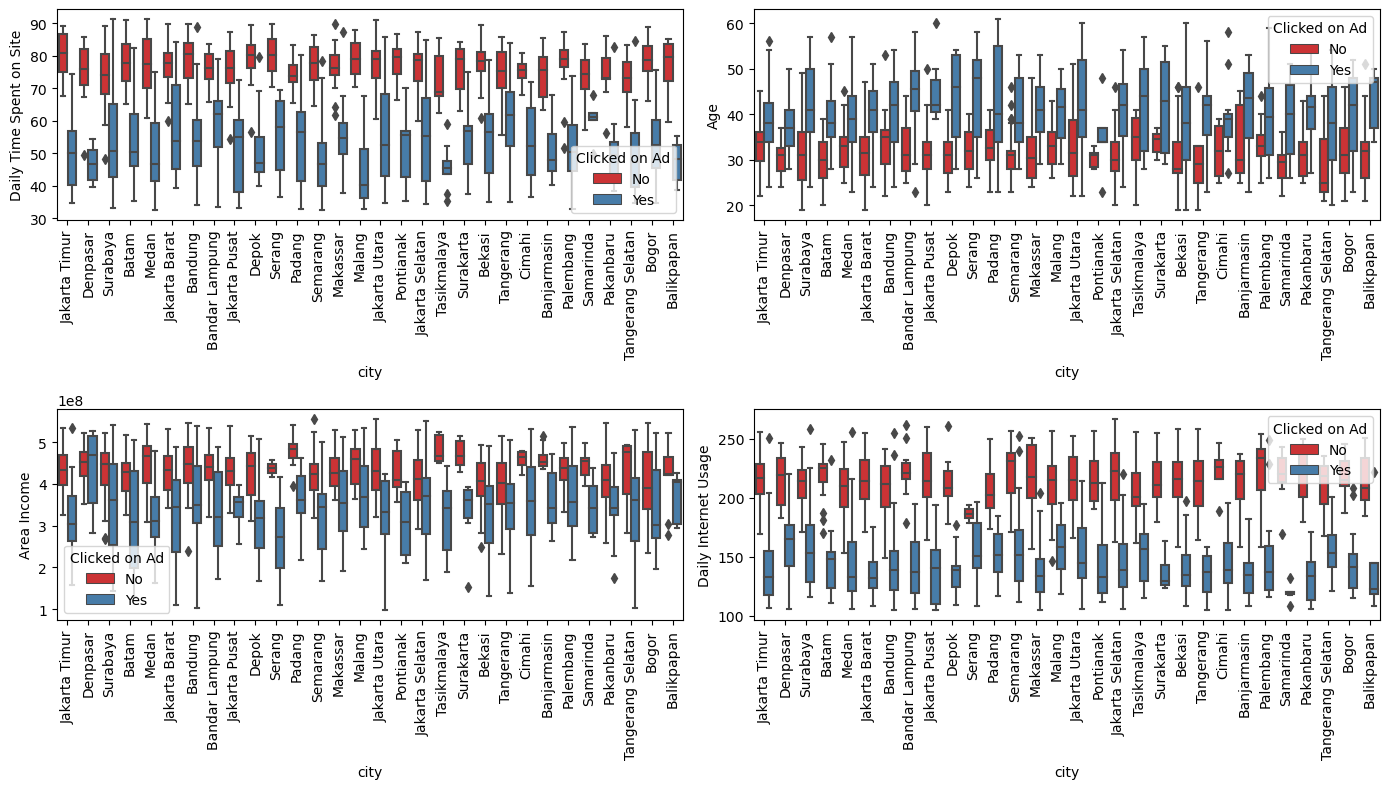

In [30]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')

for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(ax=ax, data=df, x='city', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.xticks(rotation='vertical')
    plt.tight_layout()

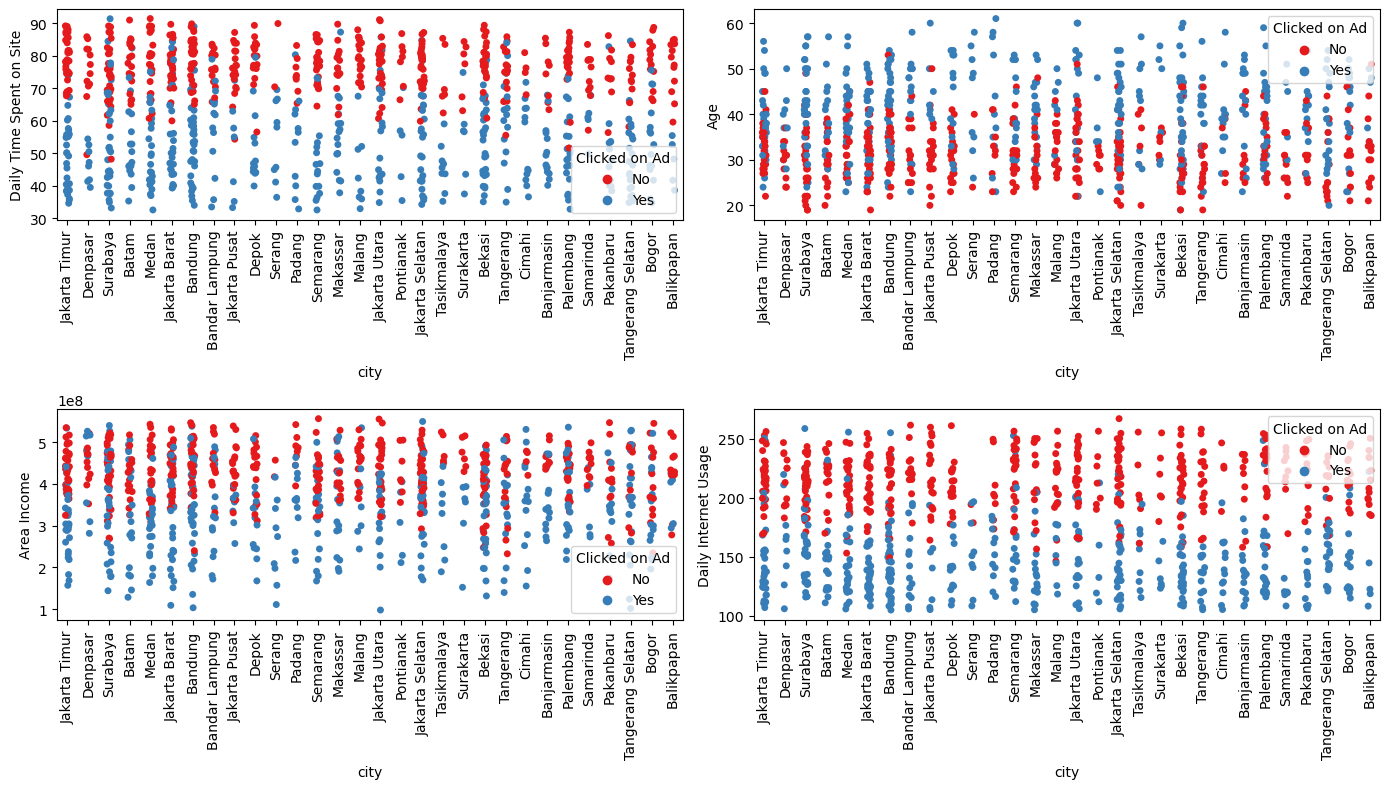

In [31]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=df, x='city', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.xticks(rotation='vertical')
    plt.tight_layout()

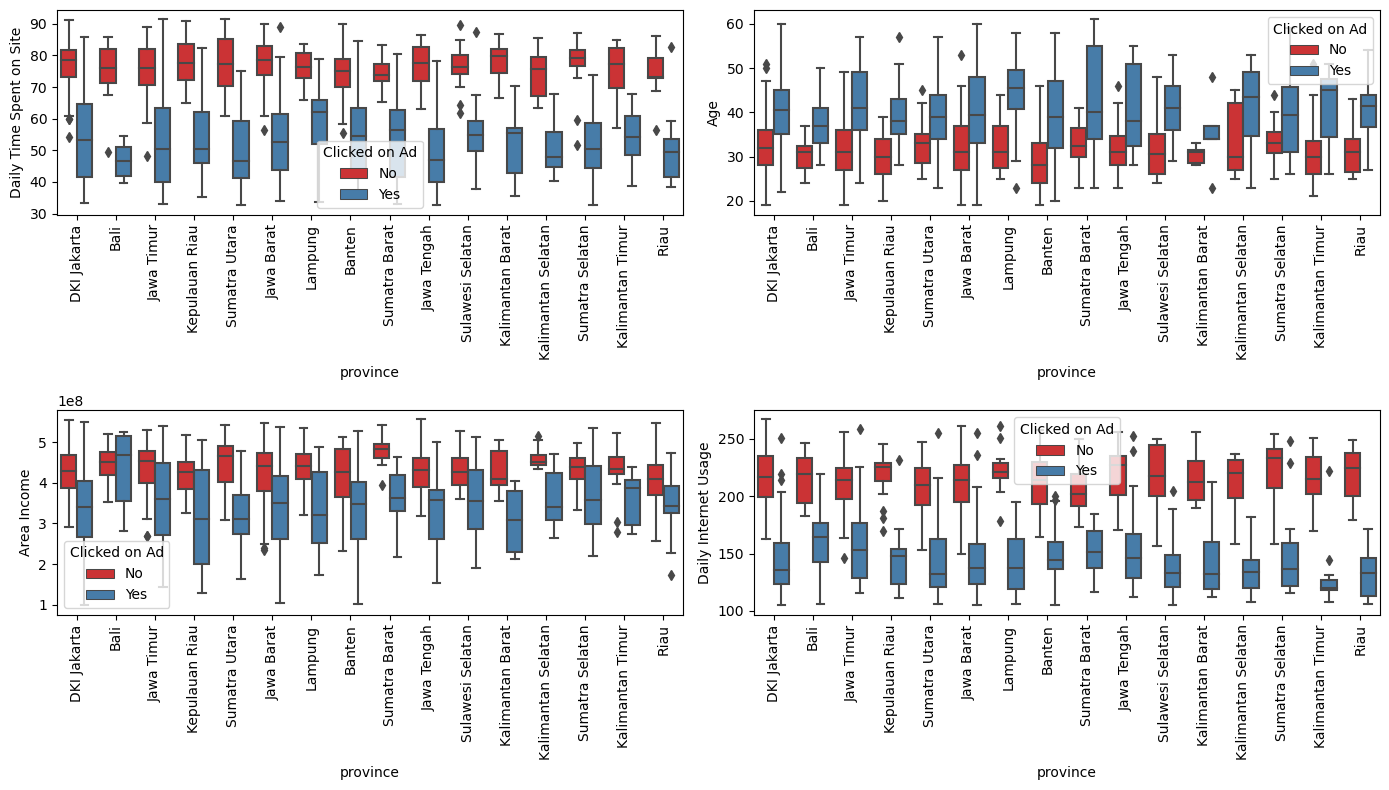

In [32]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')

for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(ax=ax, data=df, x='province', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.xticks(rotation='vertical')
    plt.tight_layout()

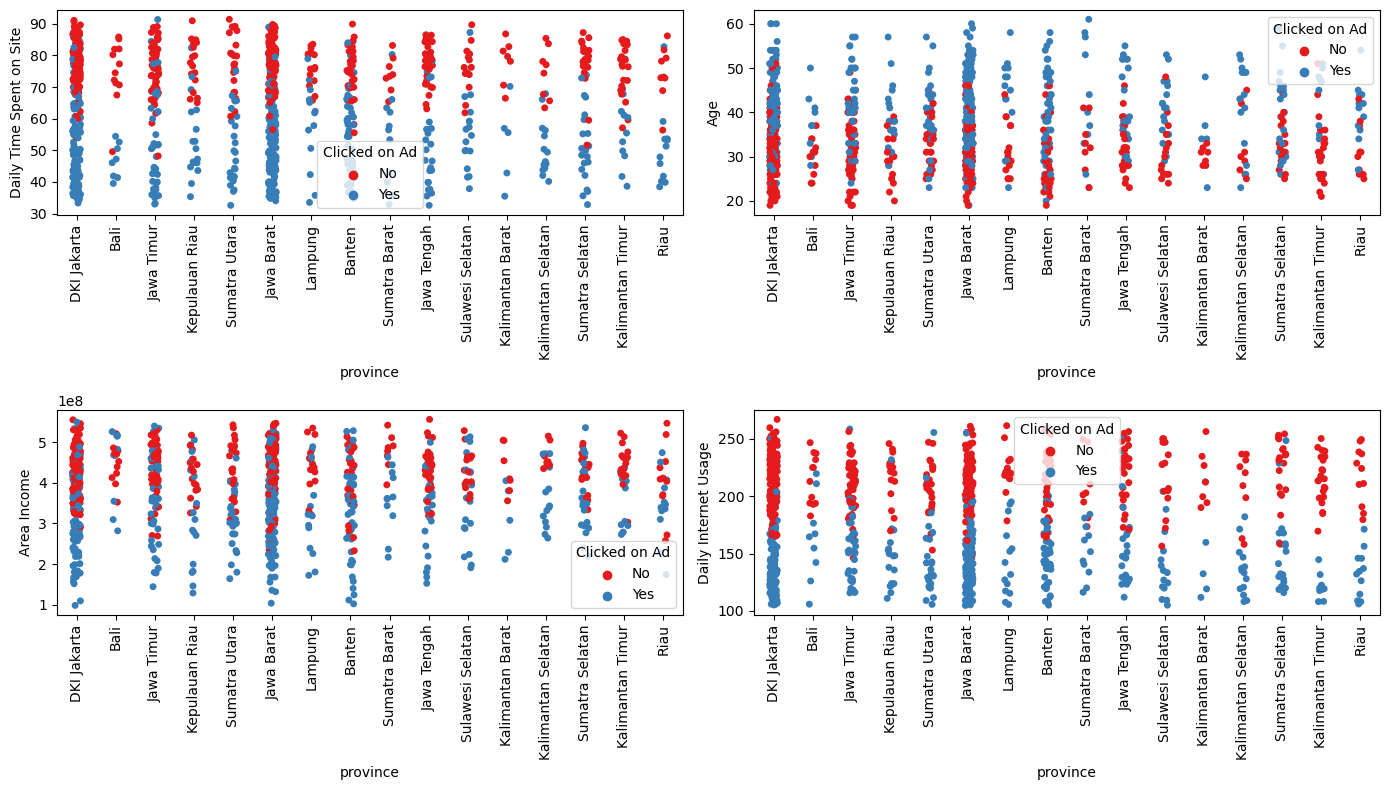

In [33]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(num)): 
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=df, x='province', y=num[i], hue='Clicked on Ad', palette='Set1') 
    plt.xticks(rotation='vertical')
    plt.tight_layout()

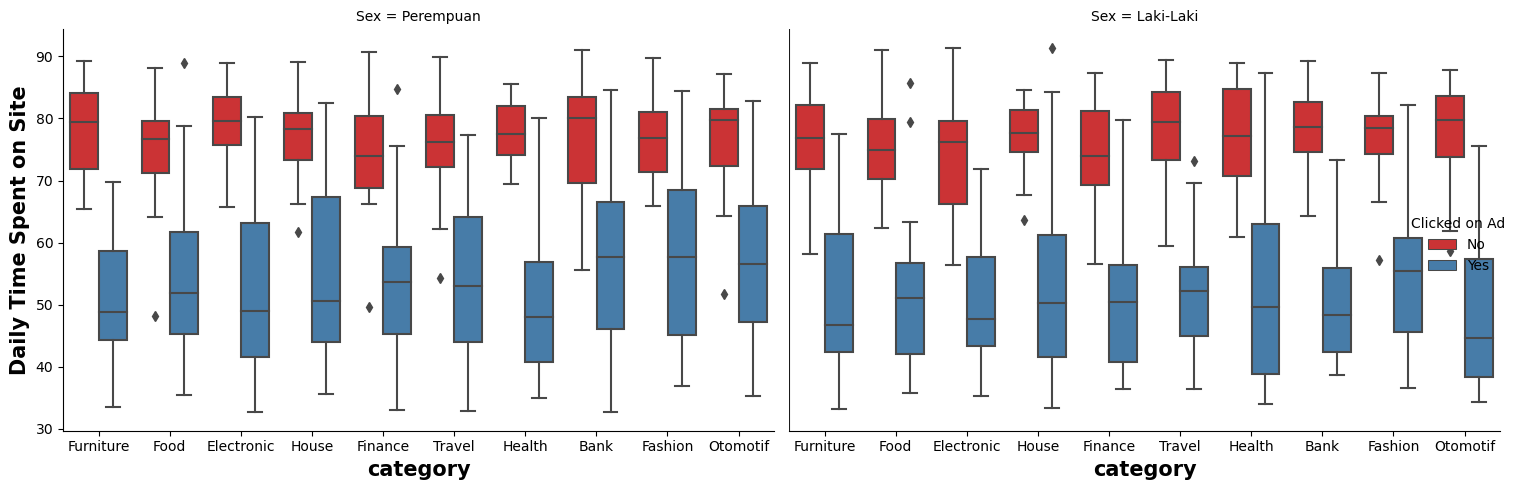

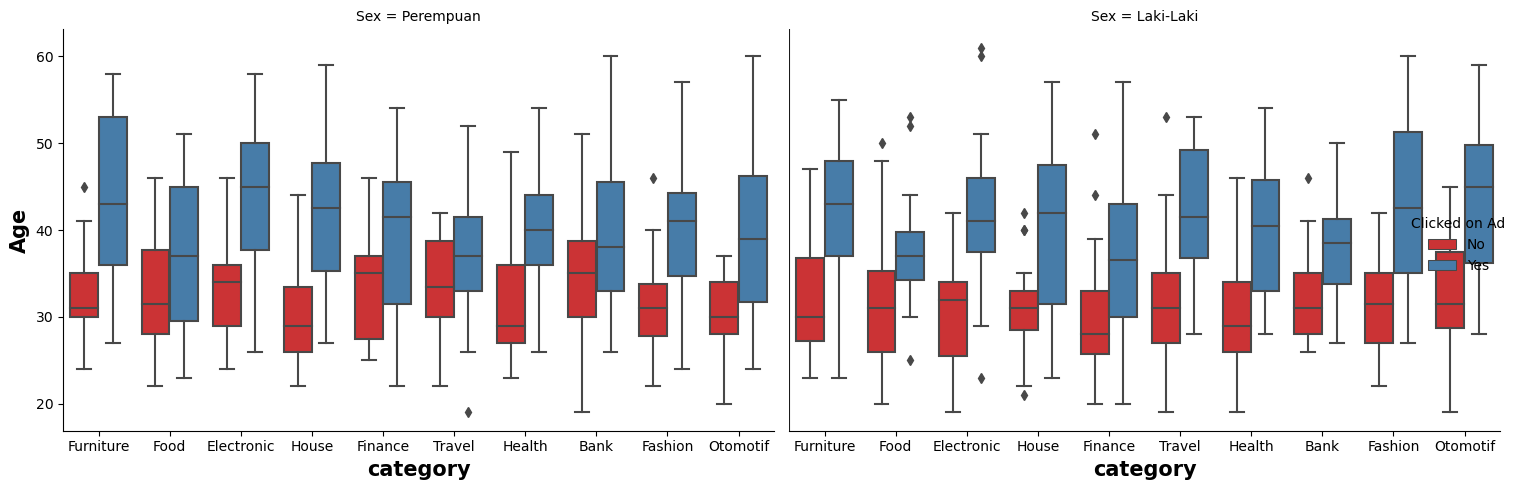

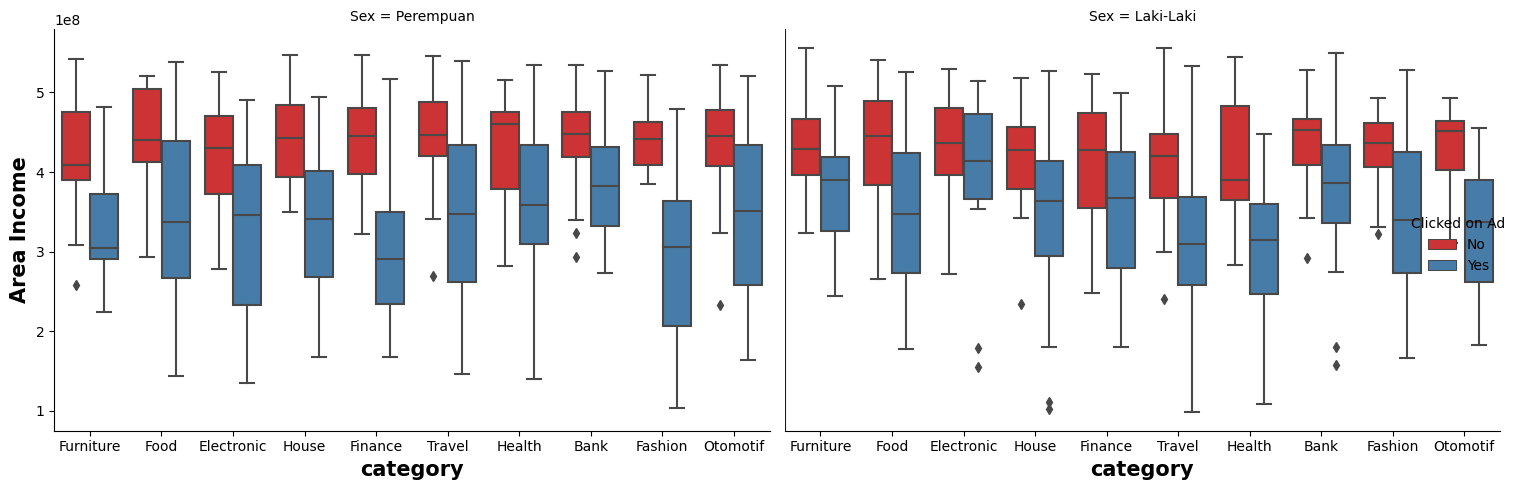

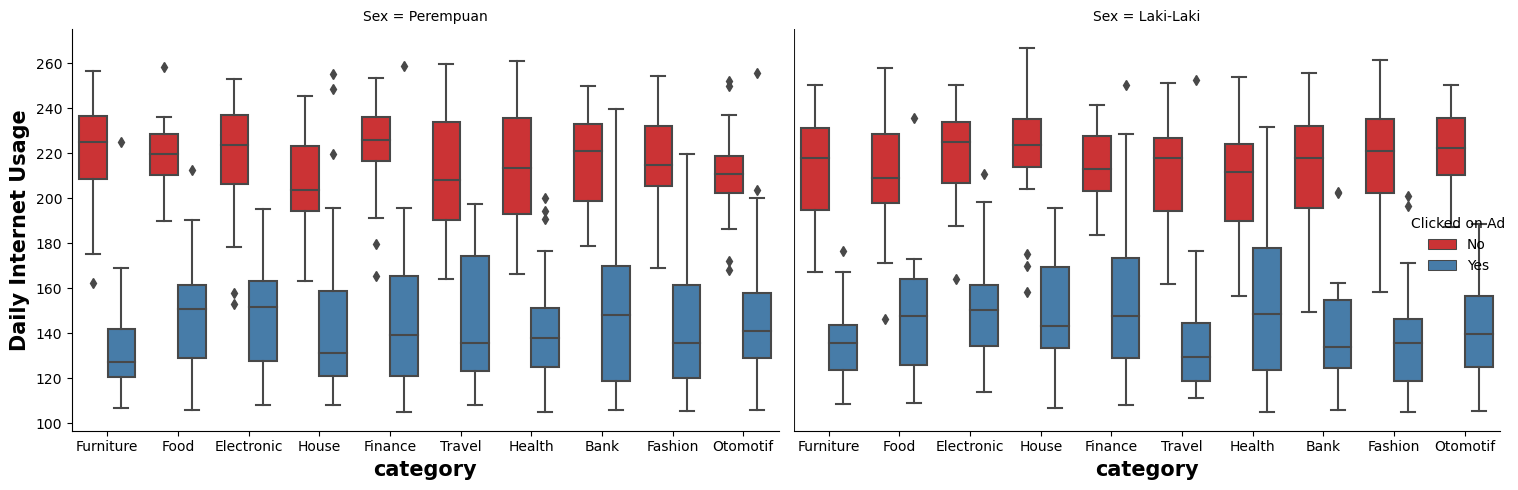

In [34]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.style.use('default')

for i in range(len(num)):
    g = sns.catplot(kind='box', data=df, x='category', y=num[i], col='Sex', hue ='Clicked on Ad', height=5, aspect=11.7/8.27, palette='Set1')
    g.set_xticklabels(fontdict= {'fontsize': 10} )
    g.set_xlabels(fontsize = 15, fontweight ='bold')
    g.set_ylabels(num[i], fontsize = 15, fontweight ='bold')

    for ax in g.axes.flatten()[1:]:
        ax.spines['left'].set_visible(False)
        [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
        xmin,xmax = ax.get_xlim()
        ax.axvline(xmin, ls='-', color='k')

    plt.tight_layout()
    plt.savefig(f'boxplot_{num[i]}.png') 

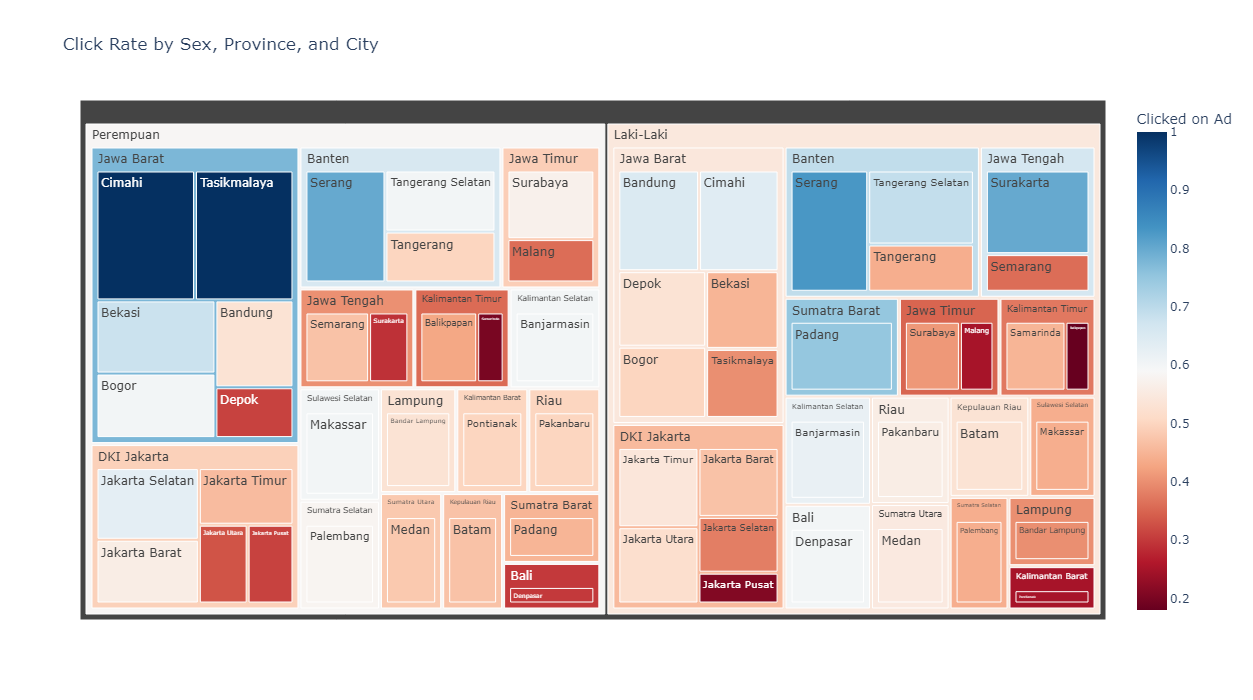

In [35]:
# Calculate the click rate for each combination of 'Sex', 'province', and 'city', and round it
click_rate = df.groupby(['Sex', 'province', 'city'])['Clicked on Ad'].apply(lambda x: round(x.eq('Yes').mean(), 2)).reset_index()

# Create the treemap
fig = px.treemap(click_rate, path=['Sex', 'province', 'city'], values='Clicked on Ad',
                  color='Clicked on Ad', hover_data=['city'],
                  color_continuous_scale='RdBu',
                  title='Click Rate by Sex, Province, and City')

# Change the figure size to be square
fig.update_layout(autosize=False, width=1000, height=700)

fig.show()

In [36]:
df2 = df.copy()

In [37]:
bins = list(np.arange(15,max(df2['Age'])+5, 5))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df2['age_group'] = pd.cut(df2['Age'],bins=bins, include_lowest=True, labels=labels)

In [38]:
# Mengelompokkan data berdasarkan 'total_spent_group' dan 'Response', dan menghitung rata-rata 'ConversionRate' untuk setiap grup
df2_groupby = df2.groupby(['age_group', 'Clicked on Ad'])['Daily Internet Usage'].agg(['median']).reset_index()
df2_groupby.columns = ['Age Group', 'Clicked on Ad', 'Avg Daily Internet Usage']
df2_groupby.head()

Age Group Clicked on Ad  Avg Daily Internet Usage
0     15-20            No                    194.05
1     15-20           Yes                    178.42
2     20-25            No                    209.82
3     20-25           Yes                    151.95
4     25-30            No                    212.79

# Data Preprocessing

## Handle missing value

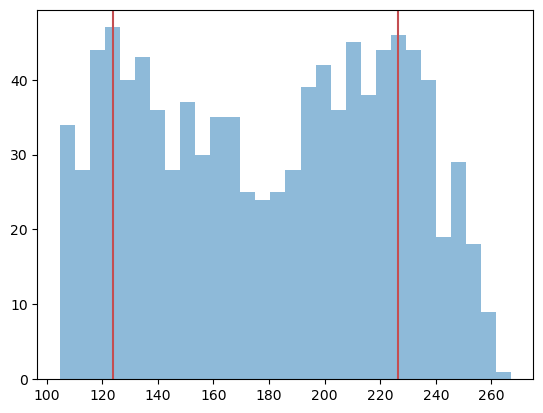

226.45250000000001 123.70683333333334


In [39]:
df3 = df.copy()
df3 = df3.dropna(subset=['Daily Internet Usage'])

import numpy as np
import matplotlib.pyplot as plt

# Hitung histogram data
counts, bins = np.histogram(df3['Daily Internet Usage'], bins=30)

# Temukan indeks dari dua bin dengan hitungan tertinggi
peak1_idx, peak2_idx = np.argpartition(counts, -2)[-2:]

# Hitung titik tengah dari dua bin ini untuk mendapatkan dua puncak
peak1 = 0.5 * (bins[peak1_idx] + bins[peak1_idx + 1])
peak2 = 0.5 * (bins[peak2_idx] + bins[peak2_idx + 1])

# plot
plt.hist(df3['Daily Internet Usage'], bins=30, alpha=0.5)
plt.axvline(peak1, color='r')
plt.axvline(peak2, color='r')
plt.show()

print(peak1, peak2)

In [40]:
# Tentukan nilai tengah antara dua puncak
df3 = df.copy()

#peak1 = 226.45250000000001
#peak2 = 123.70683333333334

mid_point = (peak1 + peak2) / 2

# Buat kolom baru 'Group' yang menunjukkan apakah setiap nilai di atas atau di bawah mid_point
df3['Group'] = np.where(df3['Daily Internet Usage'] > mid_point, 'Above', 'Below')

# Hitung median dari setiap grup
medians = df3.groupby('Group')['Daily Internet Usage'].median()

# Buat fungsi yang akan mengembalikan median yang sesuai berdasarkan grup
def fill_missing(row):
    if pd.isna(row['Daily Internet Usage']):
        return medians[row['Group']]
    else:
        return row['Daily Internet Usage']

df3['Daily Internet Usage'] = df3.apply(fill_missing, axis=1)

In [41]:
df3['Daily Time Spent on Site'] = df3['Daily Time Spent on Site'].fillna(df3['Daily Time Spent on Site'].median())
df3['Area Income'] = df3['Area Income'].fillna(df3['Area Income'].median())
df3 = df3.dropna(subset=['Sex'])
df_prep = df3.drop(columns=['Group']).copy()
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  997 non-null    float64       
 1   Age                       997 non-null    int64         
 2   Area Income               997 non-null    float64       
 3   Daily Internet Usage      997 non-null    float64       
 4   Sex                       997 non-null    object        
 5   Timestamp                 997 non-null    datetime64[ns]
 6   Clicked on Ad             997 non-null    object        
 7   city                      997 non-null    object        
 8   province                  997 non-null    object        
 9   category                  997 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 85.7+ KB


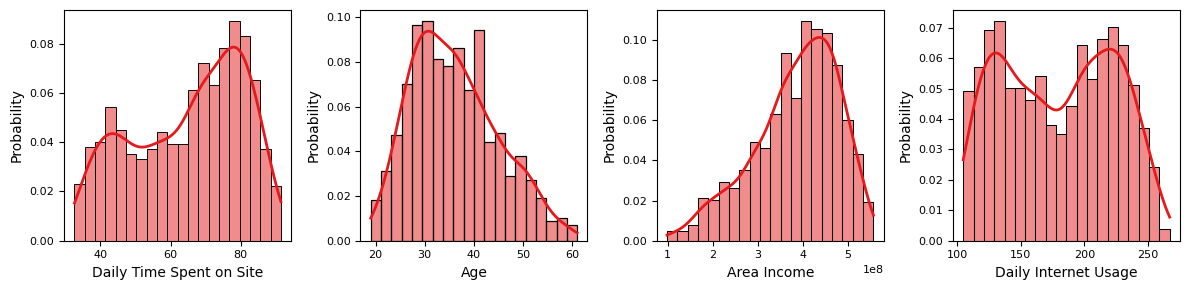

In [42]:
# cek pola distribusi setelah imputasi apakah terdapat perubahan pola
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.histplot(df_prep[num[i]], kde = True, stat = "probability", color='#e41a1c', bins=20)
    plt.tight_layout()

imputasi missing value pada, daily time spent on site, dan area income tidak merubah pola distribusi

## Change data type

In [43]:
df_prep['Timestamp'] = pd.to_datetime(df_prep['Timestamp'])

# Buat kolom baru untuk tahun, bulan, minggu dan hari
df_prep['Year'] = df_prep['Timestamp'].dt.year
df_prep['Month'] = df_prep['Timestamp'].dt.month
df_prep['Week'] = df_prep['Timestamp'].dt.week
df_prep['Day'] =df_prep['Timestamp'].dt.day

In [44]:
df_prep.describe()

Daily Time Spent on Site         Age   Area Income  \
count                997.000000  997.000000  9.970000e+02   
mean                  64.944243   36.039117  3.851095e+08   
std                   15.743494    8.779396  9.360008e+07   
min                   32.600000   19.000000  9.797550e+07   
25%                   51.500000   29.000000  3.299745e+08   
50%                   68.110000   35.000000  3.990683e+08   
75%                   78.320000   42.000000  4.569611e+08   
max                   91.430000   61.000000  5.563936e+08   

       Daily Internet Usage    Year       Month        Week         Day  
count            997.000000   997.0  997.000000  997.000000  997.000000  
mean             179.411680  2016.0    3.815446   15.410231   15.458375  
std               43.908929     0.0    1.928450    9.723239    8.730200  
min              104.780000  2016.0    1.000000    1.000000    1.000000  
25%              137.430000  2016.0    2.000000    8.000000    8.000000  
50%              181.020000  2016.0    4.000000   15.000000   15.000000  
75%              218.490000  2016.0    5.000000   22.000000   23.000000  
max              267.010000  2016.0    7.000000   53.000000   31.000000

In [45]:
df_prep = df_prep.drop(columns=['Timestamp']).copy()

In [46]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  997 non-null    float64
 1   Age                       997 non-null    int64  
 2   Area Income               997 non-null    float64
 3   Daily Internet Usage      997 non-null    float64
 4   Sex                       997 non-null    object 
 5   Clicked on Ad             997 non-null    object 
 6   city                      997 non-null    object 
 7   province                  997 non-null    object 
 8   category                  997 non-null    object 
 9   Year                      997 non-null    int64  
 10  Month                     997 non-null    int64  
 11  Week                      997 non-null    int64  
 12  Day                       997 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 109.0+ KB


## Split data

In [47]:
df_new = df_prep.copy()
X = df_new.drop(columns=['Clicked on Ad',], axis=1)
y = df_new[['Clicked on Ad']]

X.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
                                                                        
0                       68.95   35  432837300.0                256.09   
651                     81.25   33  456306060.0                222.35   
730                     65.53   19  357346290.0                190.17   
233                     78.32   28  345163980.0                239.52   
520                     46.61   42  460997180.0                136.18   

           Sex           city         province    category  Year  Month  Week  \
                                                                                
0    Perempuan  Jakarta Timur      DKI Jakarta   Furniture  2016      3    12   
651  Laki-Laki      Palembang  Sumatra Selatan     Fashion  2016      4    15   
730  Laki-Laki  Jakarta Barat      DKI Jakarta  Electronic  2016      6    25   
233  Perempuan       Semarang      Jawa Tengah        Bank  2016      6    25   
520  Perempuan          Medan    Sumatra Utara    Otomotif  2016      1    53   

     Day  
          
0     27  
651   16  
730   20  
233   26  
520    1

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [49]:
print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(697, 12)
(697, 1)

(300, 12)
(300, 1)


## Feature encoding

In [76]:
X_train_encode = pd.get_dummies(X_train, columns=['Sex', 'city', 'province', 'category'], drop_first=True)
X_test_encode = pd.get_dummies(X_test, columns=['Sex', 'city', 'province', 'category'], drop_first=True)

y_train = y_train.replace({'Clicked on Ad': {'Yes': 1, 'No': 0}})
y_test = y_test.replace({'Clicked on Ad': {'Yes': 1, 'No': 0}})

In [77]:
print(X_train_encode.shape)
print('')
print(X_test_encode.shape)

(697, 62)

(300, 62)


## Feature scaling

In [78]:
X_train_encode = X_train_encode.drop(columns=['Year'], axis=1)
X_test_encode = X_test_encode.drop(columns=['Year'], axis=1)
print(X_train_encode.head())
print('')
print(X_test_encode.head())

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Month  \
                                                                               
130                     46.98   50  151514370.0                175.37      5   
289                     60.53   24  468117300.0                167.22      3   
135                     49.89   39  123969860.0                160.03      4   
413                     56.99   40  263992610.0                108.15      7   
426                     54.43   37  526261400.0                154.74      5   

     Week  Day  Sex_Perempuan  city_Bandar Lampung  city_Bandung  ...  \
                                                                  ...   
130    18    4              1                    0             0  ...   
289    12   25              1                    0             0  ...   
135    15   16              0                    0             0  ...   
413    28   16              1                    0             0  ...   
4

In [79]:
from sklearn.preprocessing import StandardScaler

X_train_encode_standard = X_train_encode.copy()
X_test_encode_standard = X_test_encode.copy()

num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Month', 'Week','Day']
ss = StandardScaler()

# Assuming nums is a list of numeric columns in your datasets
for n in num:
    scaler = ss.fit(X_train[[n]])
    X_train_encode_standard[n] = scaler.transform(X_train_encode_standard[[n]])
    X_test_encode_standard[n] = scaler.transform(X_test_encode_standard[[n]])

# Copy the scaled datasets to new variables
#X_train_encode_standard = X_train_encode.copy()
#X_test_encode_standard = X_test_encode.copy()

In [81]:
X_train_encode_standard.head()

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
                                                                             
130                 -1.151602  1.571347    -2.517956             -0.103659   
289                 -0.286035 -1.386579     0.872542             -0.288629   
135                 -0.965713  0.319917    -2.812930             -0.451812   
413                 -0.512168  0.433683    -1.313427             -1.629268   
426                 -0.675700  0.092384     1.495206             -0.571872   

        Month      Week       Day  Sex_Perempuan  city_Bandar Lampung  \
                                                                        
130  0.619048  0.265246 -1.296537              1                    0   
289 -0.408277 -0.340575  1.083971              1                    0   
135  0.105386 -0.037665  0.063753              0                    0   
413  1.646373  1.274948  0.063753              1                    0   
426  0.619048  0.669127  1.764117              0                    0   

     city_Bandung  ...  province_Sumatra Utara  category_Electronic  \
                   ...                                                
130             0  ...                       0                    1   
289             0  ...                       0                    0   
135             0  ...                       0                    0   
413             0  ...                       0                    0   
426             0  ...                       0                    0   

     category_Fashion  category_Finance  category_Food  category_Furniture  \
                                                                             
130                 0                 0              0                   0   
289                 0                 0              0                   0   
135                 0                 0              0                   0   
413                 0                 1              0                   0   
426                 0                 0              1                   0   

     category_Health  category_House  category_Otomotif  category_Travel  
                                                                          
130                0               0                  0                0  
289                0               0                  1                0  
135                0               0                  0                1  
413                0               0                  0                0  
426                0               0                  0                0  

[5 rows x 61 columns]

In [82]:
X_test_encode_standard.head()

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
                                                                             
327                  0.755841 -0.476448     0.798290              1.172298   
932                 -0.109088  0.206151     0.587491             -1.446794   
610                 -2.050388  0.092384    -0.265572              0.024572   
62                   0.451774 -0.817747     1.198971             -0.236883   
192                 -0.275175  1.457581    -0.917604             -1.574344   

        Month      Week       Day  Sex_Perempuan  city_Bandar Lampung  \
                                                                        
327 -0.408277 -0.643486 -1.409895              1                    0   
932  0.619048  0.366216 -0.729749              1                    0   
610  1.646373  1.274948  0.177111              1                    0   
62  -0.408277 -0.542515 -0.729749              1                    0   
192  1.132710  0.871067  0.403826              0                    0   

     city_Bandung  ...  province_Sumatra Utara  category_Electronic  \
                   ...                                                
327             0  ...                       0                    0   
932             0  ...                       0                    0   
610             0  ...                       0                    0   
62              0  ...                       0                    0   
192             0  ...                       0                    0   

     category_Fashion  category_Finance  category_Food  category_Furniture  \
                                                                             
327                 1                 0              0                   0   
932                 0                 0              0                   1   
610                 0                 0              0                   0   
62                  0                 0              0                   0   
192                 0                 0              0                   0   

     category_Health  category_House  category_Otomotif  category_Travel  
                                                                          
327                0               0                  0                0  
932                0               0                  0                0  
610                0               0                  0                1  
62                 0               1                  0                0  
192                0               1                  0                0  

[5 rows x 61 columns]

# Data Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# pip install --upgrade scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
#X_train = X_train_encode
#X_test = X_test_encode

def eval_classification(model, model_name, X_train, X_test):
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    score_f1 = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)
    score_rocauc = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    
    # Initialization
    results = {'Evaluation Metrics': [], 'Train': [], 'Test': []}

    # Train
    train_scores = [
        round(accuracy_score(y_train, y_pred_train),4),
        round(precision_score(y_train, y_pred_train),4),
        round(recall_score(y_train, y_pred_train),4),
        round(f1_score(y_train, y_pred_train),4),
        round(score_f1['train_score'].mean(),4),
        round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),4),
        round(score_rocauc['train_score'].mean(),4)
    ]

    # Test    
    test_scores = [
        round(accuracy_score(y_test, y_pred_test), 4),
        round(precision_score(y_test, y_pred_test), 4),
        round(recall_score(y_test, y_pred_test), 4),
        round(f1_score(y_test, y_pred_test), 4),
        round(score_f1['test_score'].mean(), 4),
        round(roc_auc_score(y_test, y_pred_proba_test[:, 1]), 4),
        round(score_rocauc['test_score'].mean(), 4)
    ]

    # Metrics
    metrics = [
        'Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'F1 Score (crossval)', 
        'ROC AUC',
        'ROC AUC (crossval)'
    ]

    # Update results dictionary
    results['Evaluation Metrics'].extend(metrics)
    results['Train'].extend(train_scores)
    results['Test'].extend(test_scores)

    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    # print('Model Evaluation in Training - Testing using '+model_name+':\n')
    return df_results

## Using Data without Scaling

In [103]:
X_train = X_train_encode
X_test = X_test_encode

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [104]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr, 'Logistic Regression', X_train, X_test)

Evaluation Metrics   Train    Test
0             Accuracy  0.4993  0.5000
1            Precision  0.0000  0.0000
2               Recall  0.0000  0.0000
3             F1 Score  0.0000  0.0000
4  F1 Score (crossval)  0.0000  0.0000
5              ROC AUC  0.7576  0.7966
6   ROC AUC (crossval)  0.7576  0.7565

In [105]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
eval_classification(dt, 'Decision Tree', X_train, X_test)

Evaluation Metrics  Train    Test
0             Accuracy    1.0  0.9467
1            Precision    1.0  0.9467
2               Recall    1.0  0.9467
3             F1 Score    1.0  0.9467
4  F1 Score (crossval)    1.0  0.9451
5              ROC AUC    1.0  0.9467
6   ROC AUC (crossval)    1.0  0.9441

In [106]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
eval_classification(rf, 'Random Forest', X_train, X_test)

Evaluation Metrics  Train    Test
0             Accuracy    1.0  0.9600
1            Precision    1.0  0.9539
2               Recall    1.0  0.9667
3             F1 Score    1.0  0.9603
4  F1 Score (crossval)    1.0  0.9599
5              ROC AUC    1.0  0.9870
6   ROC AUC (crossval)    1.0  0.9900

In [108]:
knn = KNeighborsClassifier().fit(X_train,y_train)
eval_classification(knn, 'K-Nearest Neighbors', X_train, X_test)

Evaluation Metrics   Train    Test
0             Accuracy  0.7661  0.6767
1            Precision  0.8000  0.6853
2               Recall  0.7106  0.6533
3             F1 Score  0.7527  0.6689
4  F1 Score (crossval)  0.7501  0.6657
5              ROC AUC  0.8462  0.7348
6   ROC AUC (crossval)  0.8436  0.7211

In [109]:
gboost = GradientBoostingClassifier().fit(X_train, y_train)
eval_classification(gboost, 'Gradient Boosting', X_train, X_test)

Evaluation Metrics  Train    Test
0             Accuracy    1.0  0.9567
1            Precision    1.0  0.9597
2               Recall    1.0  0.9533
3             F1 Score    1.0  0.9565
4  F1 Score (crossval)    1.0  0.9580
5              ROC AUC    1.0  0.9887
6   ROC AUC (crossval)    1.0  0.9891

### all in classifiers

In [110]:
def eval_classification(model, model_name, X_train, X_test):
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    score_f1 = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)
    score_rocauc = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    
    # Initialization
    results = {'Evaluation Metrics': [], 'Train': [], 'Test': []}

    # Train
    train_scores = [
        round(accuracy_score(y_train, y_pred_train),4),
        round(precision_score(y_train, y_pred_train),4),
        round(recall_score(y_train, y_pred_train),4),
        round(f1_score(y_train, y_pred_train),4),
        round(score_f1['train_score'].mean(),4),
        round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),4),
        round(score_rocauc['train_score'].mean(),4)
    ]

    # Test    
    test_scores = [
        round(accuracy_score(y_test, y_pred_test), 4),
        round(precision_score(y_test, y_pred_test), 4),
        round(recall_score(y_test, y_pred_test), 4),
        round(f1_score(y_test, y_pred_test), 4),
        round(score_f1['test_score'].mean(), 4),
        round(roc_auc_score(y_test, y_pred_proba_test[:, 1]), 4),
        round(score_rocauc['test_score'].mean(), 4)
    ]

    # Metrics
    metrics = [
        'Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'F1 Score (crossval)', 
        'ROC AUC',
        'ROC AUC (crossval)'
    ]

    # Update results dictionary
    results['Evaluation Metrics'].extend(metrics)
    results['Train'].extend(train_scores)
    results['Test'].extend(test_scores)

    # Convert to DataFrame
    df_results = pd.DataFrame(results)
    # print('Model Evaluation in Training - Testing using '+model_name+':\n')
    return df_results

# Create a function to save metrics for different classifiers
def save_evaluation_metrics(models):
    all_results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        df_result = eval_classification(model, model_name, X_train, X_test)
        df_result['Classifier'] = model_name
        all_results.append(df_result)

    # Concatenate all results into a single DataFrame
    final_df = pd.concat(all_results, axis=0).reset_index(drop=True)
    return final_df

In [113]:
# Define classifiers
X_train = X_train_encode
X_test = X_test_encode

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

models = {
    'Logistic Regression': LogisticRegression().fit(X_train, y_train),
    'Random Forest': RandomForestClassifier(random_state=42).fit(X_train, y_train),
    'Decision Tree': DecisionTreeClassifier(random_state=42).fit(X_train, y_train),
    'K-Nearest Neighbors': KNeighborsClassifier().fit(X_train,y_train),
    'Gradient Boosting' : GradientBoostingClassifier().fit(X_train, y_train)
}

In [114]:
# Evaluate all classifiers and save the results
final_results =  save_evaluation_metrics(models)
pivoted_df = final_results.pivot(index='Classifier', columns='Evaluation Metrics', values=['Train', 'Test'])

pivoted_df.columns = [col[1].lower() + '_' + col[0].lower() for col in pivoted_df.columns.values]
pivoted_df.reset_index(inplace=True)

# Define the desired order of columns
column_order = [
    'Classifier',
    'accuracy_train', 
    'accuracy_test', 
    'precision_train', 
    'precision_test',
    'recall_train',
    'recall_test',
    'f1 score_train', 
    'f1 score_test', 
    'f1 score (crossval)_train', 
    'f1 score (crossval)_test',
    'roc auc_train',
    'roc auc_test',
    'roc auc (crossval)_train', 
    'roc auc (crossval)_test'
]

# Reorder the DataFrame columns
pivoted_df = pivoted_df[column_order]
pivoted_df

Classifier  accuracy_train  accuracy_test  precision_train  \
0        Decision Tree          1.0000         0.9467              1.0   
1    Gradient Boosting          1.0000         0.9533              1.0   
2  K-Nearest Neighbors          0.7661         0.6767              0.8   
3  Logistic Regression          0.4993         0.5000              0.0   
4        Random Forest          1.0000         0.9600              1.0   

   precision_test  recall_train  recall_test  f1 score_train  f1 score_test  \
0          0.9467        1.0000       0.9467          1.0000         0.9467   
1          0.9533        1.0000       0.9533          1.0000         0.9533   
2          0.6853        0.7106       0.6533          0.7527         0.6689   
3          0.0000        0.0000       0.0000          0.0000         0.0000   
4          0.9539        1.0000       0.9667          1.0000         0.9603   

   f1 score (crossval)_train  f1 score (crossval)_test  roc auc_train  \
0                     1.0000                    0.9451         1.0000   
1                     1.0000                    0.9567         1.0000   
2                     0.7501                    0.6657         0.8462   
3                     0.0000                    0.0000         0.7576   
4                     1.0000                    0.9599         1.0000   

   roc auc_test  roc auc (crossval)_train  roc auc (crossval)_test  
0        0.9467                    1.0000                   0.9441  
1        0.9884                    1.0000                   0.9892  
2        0.7348                    0.8436                   0.7211  
3        0.7966                    0.7576                   0.7565  
4        0.9870                    1.0000                   0.9900

## Using Scaling Data

In [117]:
X_train = X_train_encode_standard
X_test = X_test_encode_standard

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [118]:
# Evaluate all classifiers and save the results
final_results =  save_evaluation_metrics(models)
pivoted_df = final_results.pivot(index='Classifier', columns='Evaluation Metrics', values=['Train', 'Test'])

pivoted_df.columns = [col[1].lower() + '_' + col[0].lower() for col in pivoted_df.columns.values]
pivoted_df.reset_index(inplace=True)

# Define the desired order of columns
column_order = [
    'Classifier',
    'accuracy_train', 
    'accuracy_test', 
    'precision_train', 
    'precision_test',
    'recall_train',
    'recall_test',
    'f1 score_train', 
    'f1 score_test', 
    'f1 score (crossval)_train', 
    'f1 score (crossval)_test',
    'roc auc_train',
    'roc auc_test',
    'roc auc (crossval)_train', 
    'roc auc (crossval)_test'
]

# Reorder the DataFrame columns
pivoted_df = pivoted_df[column_order]
pivoted_df

Classifier  accuracy_train  accuracy_test  precision_train  \
0        Decision Tree          1.0000         0.9467           1.0000   
1    Gradient Boosting          1.0000         0.9567           1.0000   
2  K-Nearest Neighbors          0.9598         0.9567           0.9878   
3  Logistic Regression          0.9684         0.9733           0.9685   
4        Random Forest          1.0000         0.9600           1.0000   

   precision_test  recall_train  recall_test  f1 score_train  f1 score_test  \
0          0.9467        1.0000       0.9467          1.0000         0.9467   
1          0.9597        1.0000       0.9533          1.0000         0.9565   
2          0.9858        0.9312       0.9267          0.9587         0.9553   
3          0.9863        0.9685       0.9600          0.9685         0.9730   
4          0.9539        1.0000       0.9667          1.0000         0.9603   

   f1 score (crossval)_train  f1 score (crossval)_test  roc auc_train  \
0                     1.0000                    0.9451         1.0000   
1                     1.0000                    0.9566         1.0000   
2                     0.9531                    0.9403         0.9957   
3                     0.9720                    0.9495         0.9953   
4                     1.0000                    0.9599         1.0000   

   roc auc_test  roc auc (crossval)_train  roc auc (crossval)_test  
0        0.9467                    1.0000                   0.9441  
1        0.9888                    1.0000                   0.9892  
2        0.9852                    0.9947                   0.9833  
3        0.9871                    0.9955                   0.9889  
4        0.9872                    1.0000                   0.9900

Best model : logistic regression

In the context of ad clicks:
- High Precision: You're accurately predicting ad clicks, but you might be missing out on many users who would have clicked.
- High Recall: You're capturing a large portion of users who click on ads, but you're also predicting many users will click when they won't.

A balance between precision and recall is desired. This balance can be measured using the F1-score, which considers both precision and recall. <b>Based on F1-score above, logistic regression show the best result with value 97,3%. </b>


## Confusion Matrix

In [127]:
def get_annot(confusion_matrix):
    # Calculate the percentages
    percentages = confusion_matrix / confusion_matrix.sum()
    
    # Define labels
    labels = np.array([["True Negative", "False Positive"],
                       ["False Negative", "True Positive"]])
    
    # Combine values, percentages, and labels
    annot = np.array([["{0}\n{1:.2%}\n{2}".format(val, percentages[i,j], labels[i,j])
                       for j, val in enumerate(row)] for i, row in enumerate(confusion_matrix)])
    return annot

def eval_classification(model, model_name, X_train, X_test):
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    score_f1 = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)
    score_rocauc = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    
    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    annot_train = get_annot(cm_train)
    annot_test = get_annot(cm_test)
    
    # Display as heatmaps
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.heatmap(cm_train, annot=annot_train, fmt='', cmap='Blues', ax=ax1,
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    ax1.set_title(f"Confusion Matrix for Training Data ({model_name})")
    sns.heatmap(cm_test, annot=annot_test, fmt='', cmap='Blues', ax=ax2,
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    ax2.set_title(f"Confusion Matrix for Testing Data ({model_name})")   
    plt.show()

    # Metrics and scores
    metrics = [
        'Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'F1 Score (crossval)', 
        'ROC AUC',
        'ROC AUC (crossval)'
    ]

    train_scores = [
        round(accuracy_score(y_train, y_pred_train),4),
        round(precision_score(y_train, y_pred_train),4),
        round(recall_score(y_train, y_pred_train),4),
        round(f1_score(y_train, y_pred_train),4),
        round(score_f1['train_score'].mean(),4),
        round(roc_auc_score(y_train, y_pred_proba_train[:, 1]),4),
        round(score_rocauc['train_score'].mean(),4)
    ]

    test_scores = [
        round(accuracy_score(y_test, y_pred_test), 4),
        round(precision_score(y_test, y_pred_test), 4),
        round(recall_score(y_test, y_pred_test), 4),
        round(f1_score(y_test, y_pred_test), 4),
        round(score_f1['test_score'].mean(), 4),
        round(roc_auc_score(y_test, y_pred_proba_test[:, 1]), 4),
        round(score_rocauc['test_score'].mean(), 4)
    ]

    # Compile results into a dataframe
    results = {
        'Evaluation Metrics': metrics,
        'Train': train_scores,
        'Test': test_scores
    }
    df_results = pd.DataFrame(results)

    return df_results

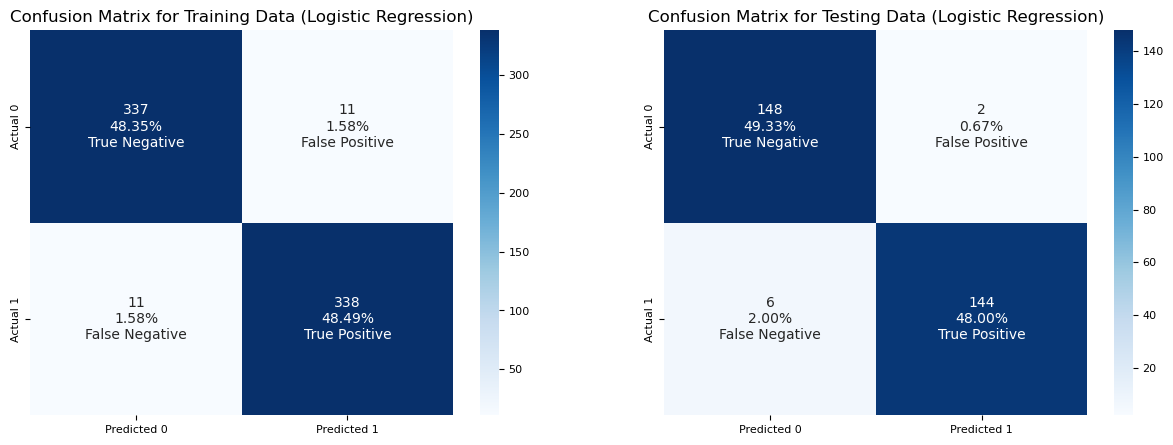

Evaluation Metrics   Train    Test
0             Accuracy  0.9684  0.9733
1            Precision  0.9685  0.9863
2               Recall  0.9685  0.9600
3             F1 Score  0.9685  0.9730
4  F1 Score (crossval)  0.9720  0.9495
5              ROC AUC  0.9953  0.9871
6   ROC AUC (crossval)  0.9955  0.9889

In [128]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr, 'Logistic Regression', X_train, X_test)

## Feature Importance

In [144]:
X_train = X_train_encode_standard
X_test = X_test_encode_standard

In [146]:
import statsmodels.api as sm

# Add a constant to the training data for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_const).fit()

# Display the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.074383
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  697
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                           46
Date:                Sat, 12 Aug 2023   Pseudo R-squ.:                  0.8927
Time:                        17:15:29   Log-Likelihood:                -51.845
converged:                       True   LL-Null:                       -483.12
Covariance Type:            nonrobust   LLR p-value:                4.314e-151
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4018   1.18e+07   1.19e-07      1.000  

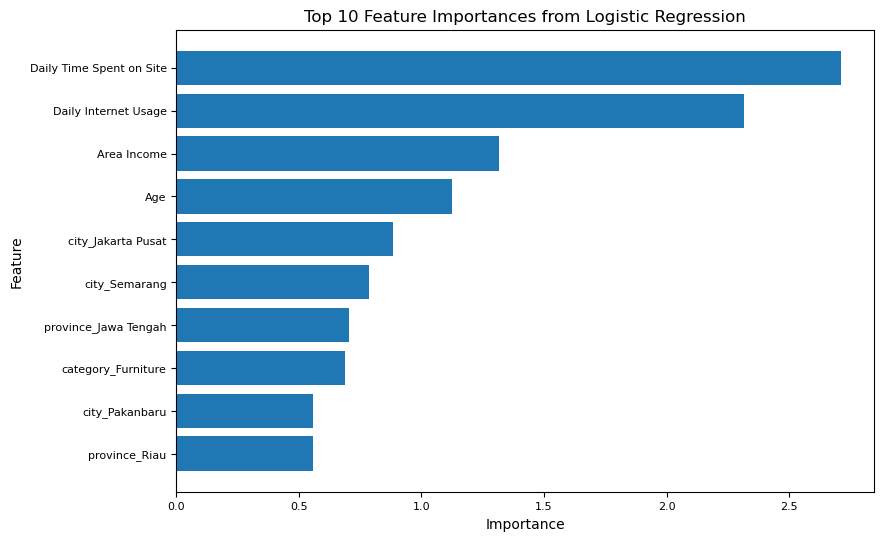

In [137]:
# Feature importances
importances = abs(LogisticRegression().fit(X_train, y_train).coef_[0])

# Map importances to feature names
feature_importances = dict(zip(X_train.columns, importances))

# Sort features based on importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract features and their importances into separate lists
features, importance_values = zip(*sorted_features)

# Plotting
# plt.figure(figsize=(9, 12))  # Set the figure size
# plt.barh(features, importance_values, align='center')
# plt.gca().invert_yaxis()  # To display the feature with the highest importance at the top
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances from Logistic Regression')
# plt.show()

# Extract the top 10 features and their importances
top_n = 10
top_features = features[:top_n]
top_importance_values = importance_values[:top_n]

# Plotting
plt.figure(figsize=(9, 6))  # Adjust the figure size
plt.barh(top_features, top_importance_values, align='center')
plt.gca().invert_yaxis()  # To display the feature with the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Logistic Regression')
plt.show()

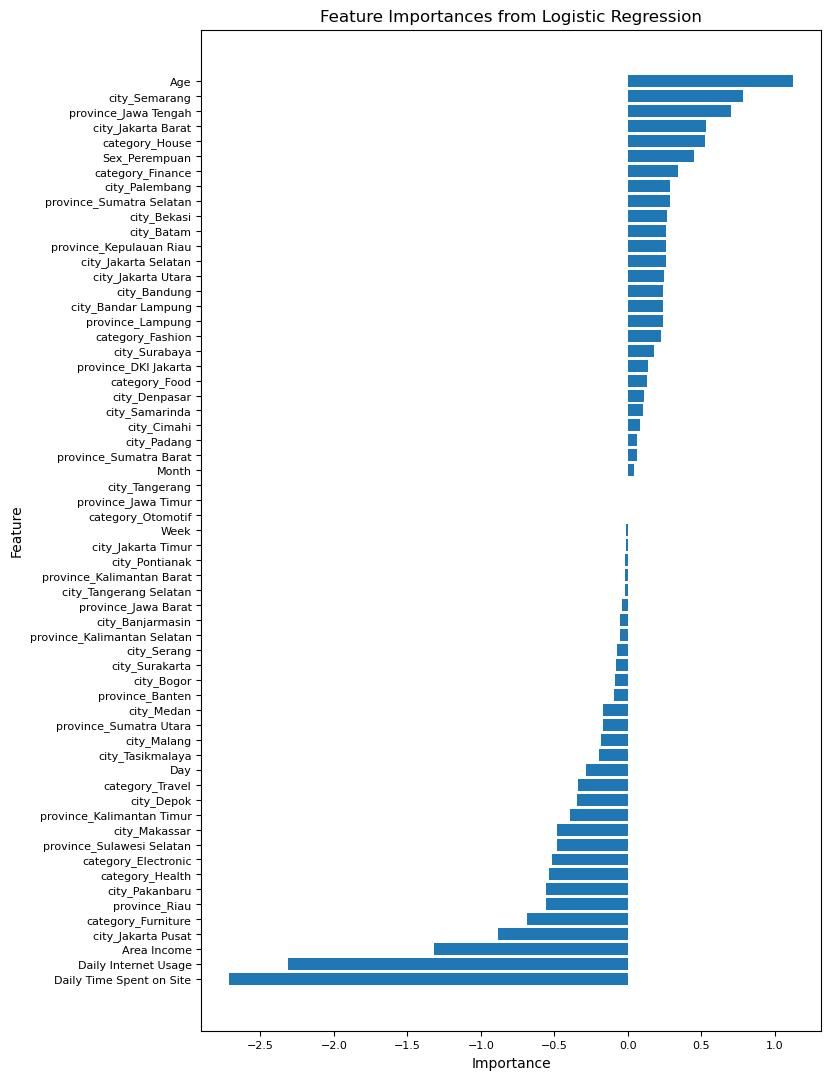

In [148]:
# Feature importances
importances = (LogisticRegression().fit(X_train, y_train).coef_[0])

# Map importances to feature names
feature_importances = dict(zip(X_train.columns, importances))

# Sort features based on importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract features and their importances into separate lists
features, importance_values = zip(*sorted_features)

# Plotting
plt.figure(figsize=(8, 13))  # Set the figure size
plt.barh(features, importance_values, align='center')
plt.gca().invert_yaxis()  # To display the feature with the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Logistic Regression')
plt.show()

# Business Simulation

In [176]:
click_ratio_before = df_prep[df_prep['Clicked on Ad'] == 'Yes'].shape[0] / len(df_prep) * 100
print("Ad Click Ratio - Before Modelling =", round(click_ratio_before, 2), "%")

# response_rate is derived from predicted data 
true_positive = 144
false_positive = 2

# Precision
click_ratio_after = true_positive/(true_positive+false_positive) * 100
print("Ad Click Ratio - After Modelling =", round(click_ratio_after, 2), "%")

Ad Click Ratio - Before Modelling = 50.05 %
Ad Click Ratio - After Modelling = 98.63 %


In [181]:
def performance_summary(true_positive=None, false_positive=None, df_prep=None, revenue=600000, cost=200000, mode='before'):
    """Summarize the performance metrics before or after modeling."""
    
    if mode == 'before':
        # Print the title
        print("\033[1m" + "Clicked Ads Performance Before Modelling" + "\033[0m")
        print("="*50)  # Separating line
        
        # Calculate metrics based on the actual data before modeling
        ad_click_total = df_prep['Clicked on Ad'].value_counts().get('Yes', 0)
        
        # Ad Clicks Percentage for 'before' mode
        click_ratio_before = (ad_click_total / len(df_prep)) * 100
        click_ratio_display = click_ratio_before

    elif mode == 'after':
        # Print the title
        print("\033[1m" + "Clicked Ads Performance After Modelling" + "\033[0m")
        print("="*50)  # Separating line
        
        # Precision
        click_ratio_after = true_positive/(true_positive + false_positive) * 100

        # Calculate metrics
        total_ad = len(df_prep)
        ad_click_total = int(round(total_ad * click_ratio_after, 0))
        click_ratio_display = click_ratio_after
        
    else:
        raise ValueError("The 'mode' parameter should be either 'before' or 'after'.")
    
    # Common metrics calculation
    total_ad = len(df_prep)
    total_cost = total_ad * cost
    total_revenue = ad_click_total * revenue
    total_profit = total_revenue - total_cost

    # Display metrics
    print(f"Total Ad Clicks: \t\t {ad_click_total}")
    print(f"Total Target Users: \t\t {total_ad}")
    print(f"Total Cost: \t\t\t Rp {total_cost:.2f}")
    print(f"Total Revenue from Clicks: \t Rp {total_revenue:.2f}")
    print(f"Total Profit: \t\t\t Rp {total_profit:.2f}")
    print("-"*50)  # Separating line

    # Calculate and display the revenue rate
    revenue_rate = (total_profit / total_revenue) * 100
    print(f"Ad Clicks Percentage: \t\t {click_ratio_display:.2f} %")
    print(f"Profit Percentage: \t\t {revenue_rate:.2f} %\n")

In [182]:
performance_summary(df_prep=df_prep, mode='before')
performance_summary(true_positive=144, false_positive=2, df_prep=df_prep, mode='after')

Clicked Ads Performance Before Modelling
Total Ad Clicks: 		 499
Total Target Users: 		 997
Total Cost: 			 Rp 199400000.00
Total Revenue from Clicks: 	 Rp 299400000.00
Total Profit: 			 Rp 100000000.00
--------------------------------------------------
Ad Clicks Percentage: 		 50.05 %
Profit Percentage: 		 33.40 %

Clicked Ads Performance After Modelling
Total Ad Clicks: 		 98334
Total Target Users: 		 997
Total Cost: 			 Rp 199400000.00
Total Revenue from Clicks: 	 Rp 59000400000.00
Total Profit: 			 Rp 58801000000.00
--------------------------------------------------
Ad Clicks Percentage: 		 98.63 %
Profit Percentage: 		 99.66 %



# END